In [1]:
import os

import matplotlib.colors
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import *
from matplotlib.colors import ListedColormap
from adjustText import adjust_text

In [2]:
save_plots = True

Read modeling results and data point counts.

In [3]:
data = pd.read_csv('../analysis/modelling/all_modelling_results.tsv.xz', sep='\t')
counts = pd.read_csv('../analysis/modelling/all_modelling_counts.tsv.xz', sep='\t')

Determine counts.

In [4]:
all_data = data.merge(counts, on='accession')

In [5]:
all_data['datapoints_mutant_percentage'] = all_data.num_datapoints_mutants / all_data.num_datapoints_total * 100
all_data['balance_coeff'] = (2 * (0.5 - ((50 - all_data.datapoints_mutant_percentage) / 100).abs()))

In [6]:
total_asc_order = (all_data[(all_data.subset == 'complete') & (all_data.modeltype == 'PCM') &
                        (all_data.crossval == 'random') & (all_data.folds == 'Mean') &
                        (all_data.contains_mutants == True)]
                   .query('num_datapoints_total > 100')
                   .sort_values(['num_datapoints_total', 'num_datapoints_mutants'], ascending=False)
                   )
top20_most_order = total_asc_order.accession.iloc[:20]
bottom20_most_order = total_asc_order.accession.iloc[-20:]

In [7]:
mutant_asc_order = (all_data[(all_data.subset == 'complete') & (all_data.modeltype == 'PCM') &
                             (all_data.crossval == 'random') & (all_data.folds == 'Mean') &
                             (all_data.contains_mutants == True)]
                    .query('num_datapoints_mutants > 100')
                    .sort_values(['num_datapoints_total', 'num_datapoints_mutants'], ascending=False)
                   )
top20_mutant_order = total_asc_order.accession.iloc[:20]
bottom20_mutant_order = total_asc_order.accession.iloc[-20:]

In [8]:
balance_asc_order = (all_data[(all_data.subset == 'complete') & (all_data.modeltype == 'PCM') &
                              (all_data.crossval == 'random') & (all_data.folds == 'Mean') &
                              (all_data.contains_mutants == True)]
                     .query('num_datapoints_total > 100')
                     .sort_values('balance_coeff', ascending=False)
                     )
top20_balanced_order = balance_asc_order.accession.iloc[:20]
bottom20_balanced_order = balance_asc_order.accession.iloc[-20:]

In [9]:
all_data

folds  number          R2       MSE      RMSE      MSLE     RMSLE  \
0      Fold 1     4.0  -18.963951  1.915666  1.384076  0.025973  0.161162   
1      Fold 2     4.0  -38.603712  0.485145  0.696524  0.008415  0.091734   
2      Fold 3     4.0  -16.444156  0.485275  0.696617  0.008416  0.091740   
3      Fold 4     4.0  -36.660599  0.646585  0.804105  0.009831  0.099151   
4      Fold 5     4.0 -704.363244  5.515059  2.348416  0.105129  0.324236   
...       ...     ...         ...       ...       ...       ...       ...   
21555  Fold 3   673.0    0.381401  0.558842  0.747557  0.009605  0.098005   
21556  Fold 4   673.0    0.526424  0.472153  0.687134  0.007793  0.088277   
21557  Fold 5   673.0    0.470196  0.511106  0.714917  0.008435  0.091843   
21558    Mean   673.0    0.478716  0.513423  0.716199  0.008642  0.092894   
21559      SD     0.0    0.048058  0.028754  0.020042  0.000605  0.003242   

            MAE  Explained Variance  Max Error  ...    subset  \
0      1.364290            0.433292   1.729147  ...    common   
1      0.677614           -1.121192   0.947373  ...    common   
2      0.677479            0.054686   0.949180  ...    common   
3      0.795803            0.226351   0.983381  ...    common   
4      2.345309           -0.865143   2.526364  ...    common   
...         ...                 ...        ...  ...       ...   
21555  0.515271            0.381941   6.858958  ...  complete   
21556  0.519613            0.526487   2.705204  ...  complete   
21557  0.539227            0.471337   3.030335  ...  complete   
21558  0.527602            0.480161   3.847433  ...  complete   
21559  0.010881            0.048444   1.396598  ...  complete   

       contains_mutants  modeltype    crossval  \
0                  True        PCM  per mutant   
1                  True        PCM  per mutant   
2                  True        PCM  per mutant   
3                  True        PCM  per mutant   
4                  True        PCM  per mutant   
...                 ...        ...         ...   
21555              True       QSAR      random   
21556              True       QSAR      random   
21557              True       QSAR      random   
21558              True       QSAR      random   
21559              True       QSAR      random   

                                                    path  \
0      ..\data\modelling\pcm_common_subset_mutantspli...   
1      ..\data\modelling\pcm_common_subset_mutantspli...   
2      ..\data\modelling\pcm_common_subset_mutantspli...   
3      ..\data\modelling\pcm_common_subset_mutantspli...   
4      ..\data\modelling\pcm_common_subset_mutantspli...   
...                                                  ...   
21555      ..\data\modelling\qsar_randomsplit_Q99705.tsv   
21556      ..\data\modelling\qsar_randomsplit_Q99705.tsv   
21557      ..\data\modelling\qsar_randomsplit_Q99705.tsv   
21558      ..\data\modelling\qsar_randomsplit_Q99705.tsv   
21559      ..\data\modelling\qsar_randomsplit_Q99705.tsv   

       num_datapoints_total  num_datapoints_WT  num_datapoints_mutants  \
0                     261.0              245.0                    16.0   
1                     261.0              245.0                    16.0   
2                     261.0              245.0                    16.0   
3                     261.0              245.0                    16.0   
4                     261.0              245.0                    16.0   
...                     ...                ...                     ...   
21555                3365.0             3358.0                     7.0   
21556                3365.0             3358.0                     7.0   
21557                3365.0             3358.0                     7.0   
21558                3365.0             3358.0                     7.0   
21559                3365.0             3358.0                     7.0   

       datapoints_mutant_percentage balance_coeff  
0                          6.130268    

Set output directory.

In [10]:
output_plot_dir = '../analysis/modelling_scatter_plots'

if not os.path.exists(output_plot_dir):
    os.makedirs(output_plot_dir)

In [11]:
scatter_data = (all_data[all_data.folds == 'Mean']
                [['accession', 'Pearson r', 'subset', 'contains_mutants', 'crossval', 'modeltype', 'num_datapoints_total', 'num_datapoints_mutants', 'datapoints_mutant_percentage', 'balance_coeff']]
                )
scatter_data = scatter_data.pivot(columns=['modeltype', 'subset', 'contains_mutants', 'crossval'], values=['Pearson r'], index=['accession', 'num_datapoints_total', 'num_datapoints_mutants', 'datapoints_mutant_percentage', 'balance_coeff']).reset_index()
scatter_data.columns = ['_'.join(filter(lambda x: x != '', map(str, indices))).replace(' ', '_') for indices in scatter_data.columns.values]

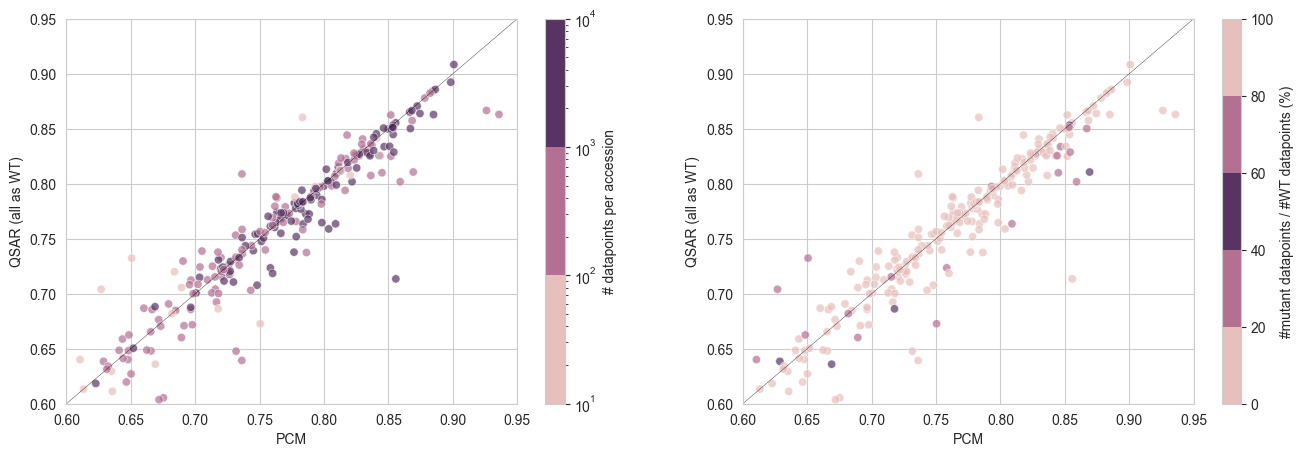

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='datapoints_mutant_percentage',
                      data=scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCM_vs_QSARallWT.svg'))

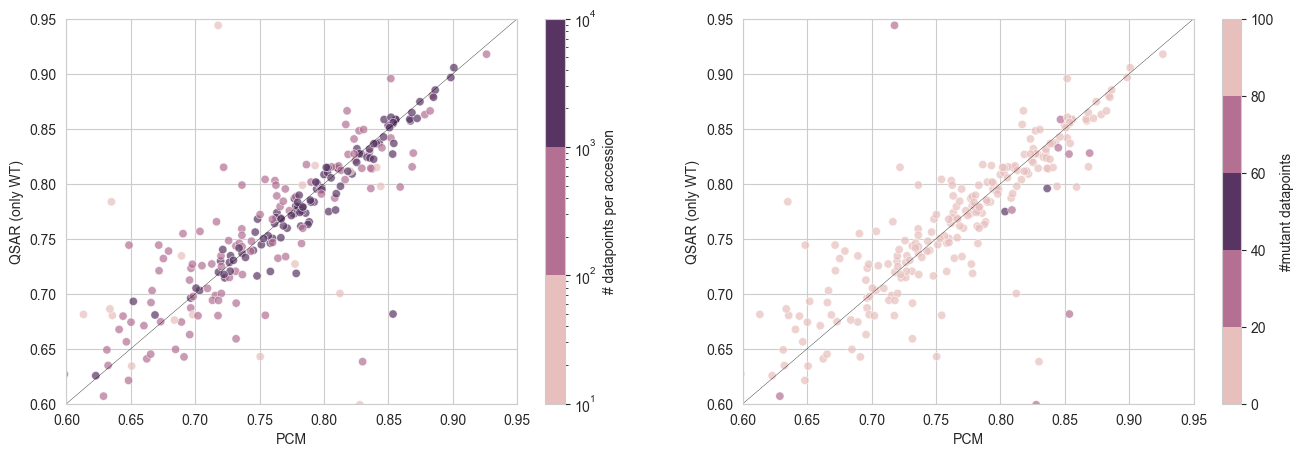

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='datapoints_mutant_percentage',
                      data=scatter_data,
                      alpha=0.7,
                      palette=palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints')


_ = ax1.set(xlabel='PCM', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCM_vs_QSARonlyWT.svg'))

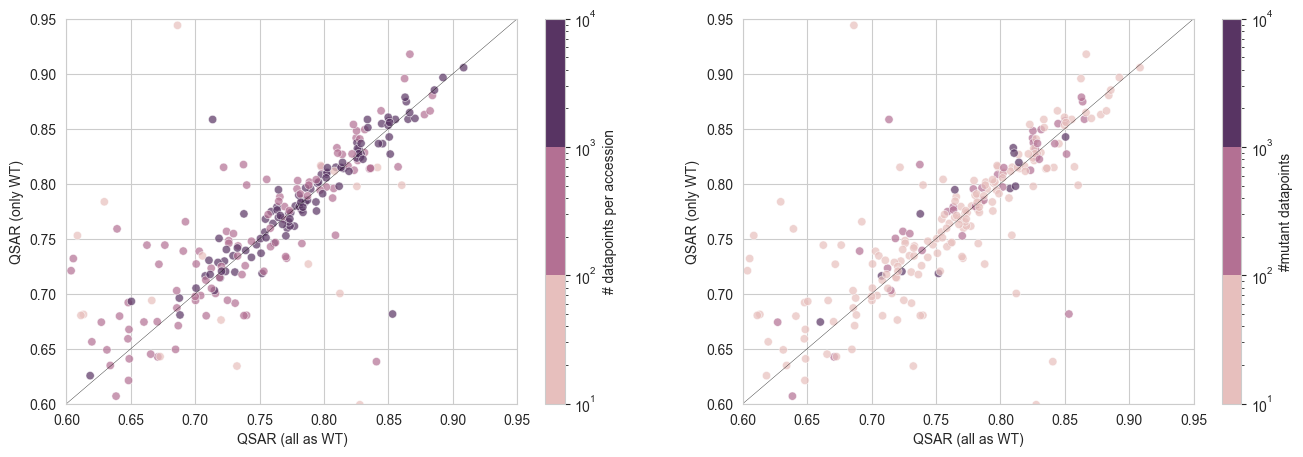

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='num_datapoints_mutants',
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      data=scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm2 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints')


_ = ax1.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.QSARallWT_vs_QSARonlyWT.svg'))

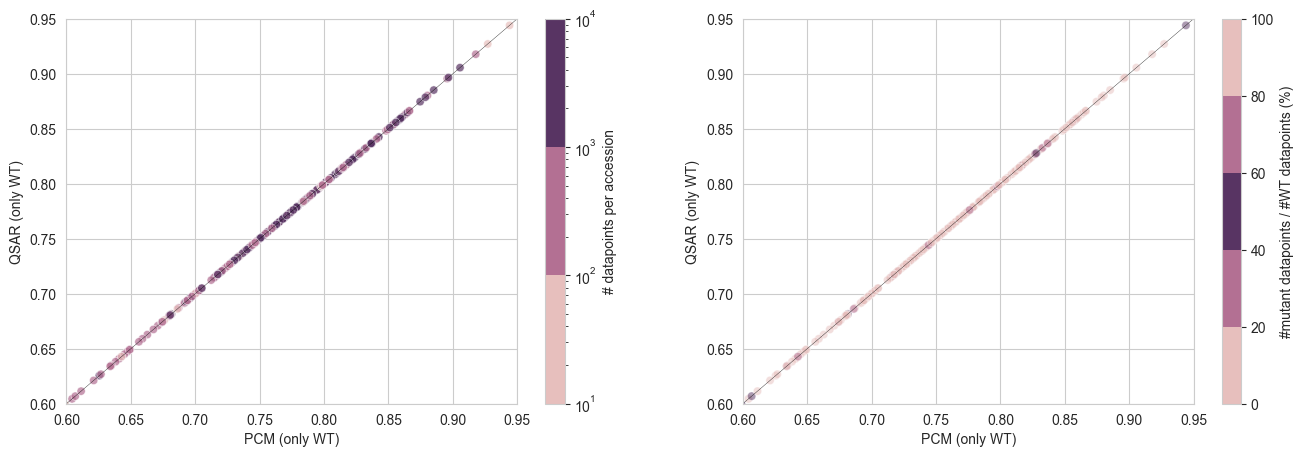

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_False_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_False_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='datapoints_mutant_percentage',
                      data=scatter_data,
                      alpha=0.5,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM (only WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM (only WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCMonlyWT_vs_QSARonlyWT.svg'))

Since the data contains only WT, adding protein descriptors does not confer PCM with any advantage over QSAR modelling. 

## Common subsets

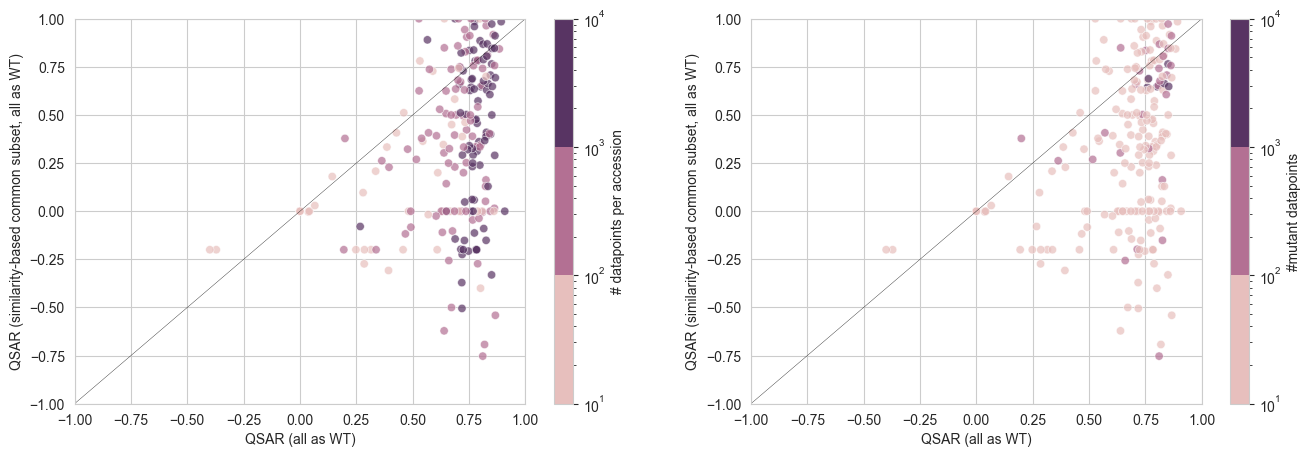

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='num_datapoints_mutants',
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      data=scatter_data,
                      alpha=0.7,
                      palette=palette,
                      ax=axes[1])
norm2 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm2 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints')


_ = ax1.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.QSARallWT_vs_QSARsim.svg'))

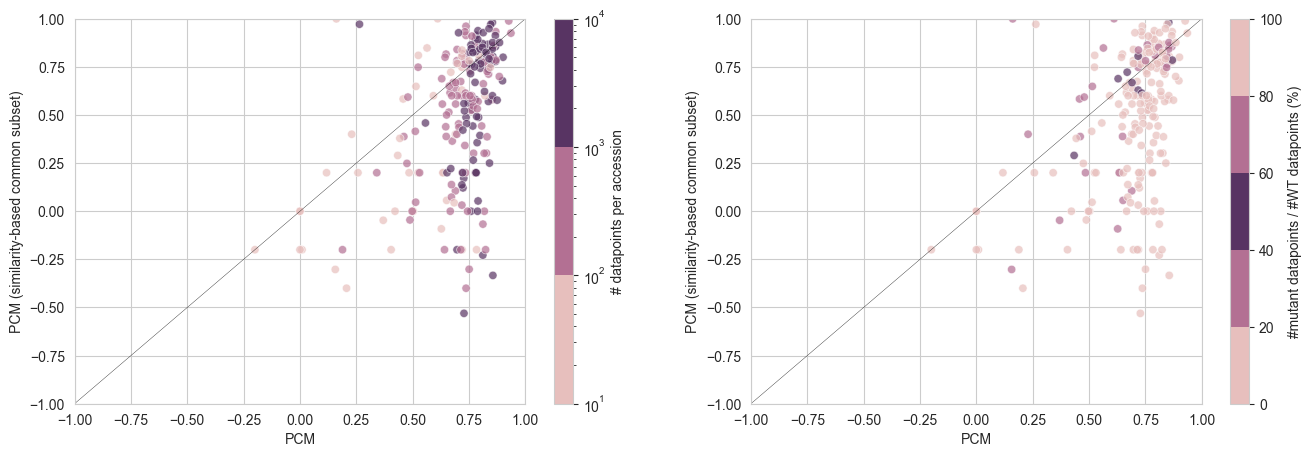

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='datapoints_mutant_percentage',
                      data=scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCM_vs_PCMsim.svg'))

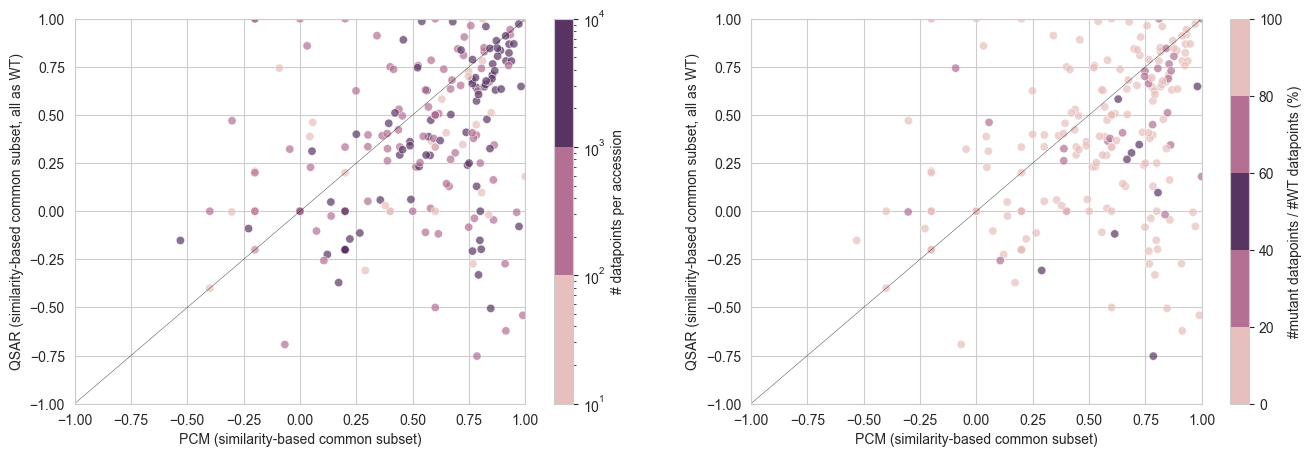

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='datapoints_mutant_percentage',
                      data=scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCMsim_vs_QSARsim.svg'))

## LOMO cross-validation

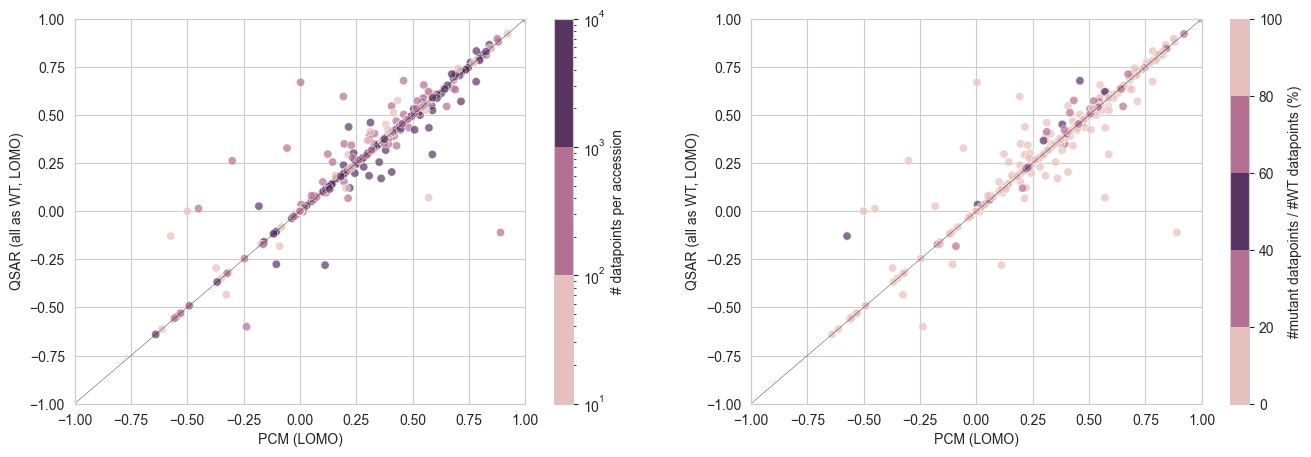

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_QSAR_complete_True_per_mutant',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_QSAR_complete_True_per_mutant',
                      hue='datapoints_mutant_percentage',
                      data=scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM (LOMO)', ylabel='QSAR (all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM (LOMO)', ylabel='QSAR (all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCM_vs_QSARallWT_LOMO.svg'))

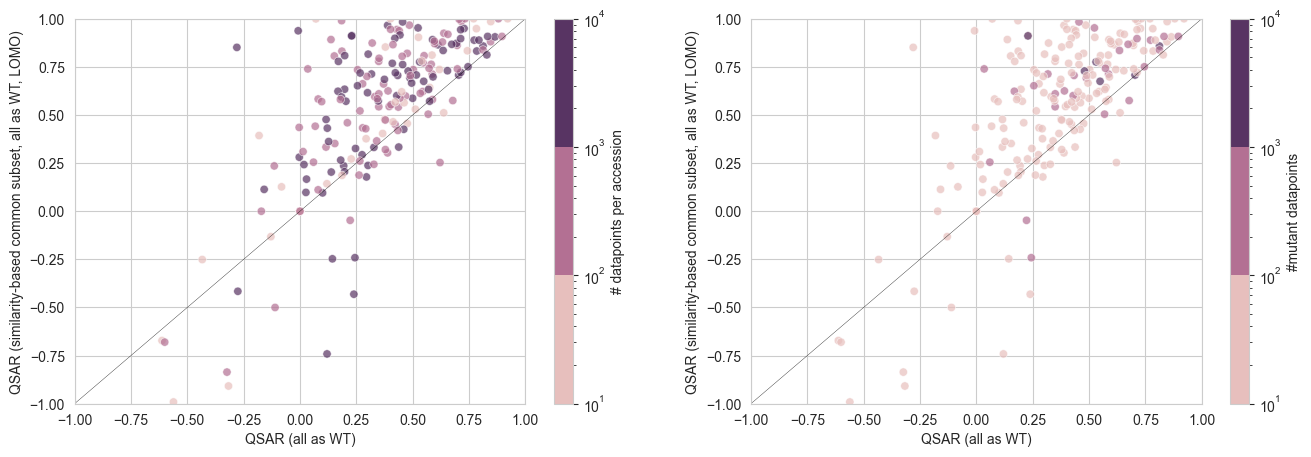

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='num_datapoints_mutants',
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      data=scatter_data,
                      alpha=0.7,
                      palette=palette,
                      ax=axes[1])
norm2 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm2 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints')


_ = ax1.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.QSARallWT_vs_QSARsim_LOMO.svg'))

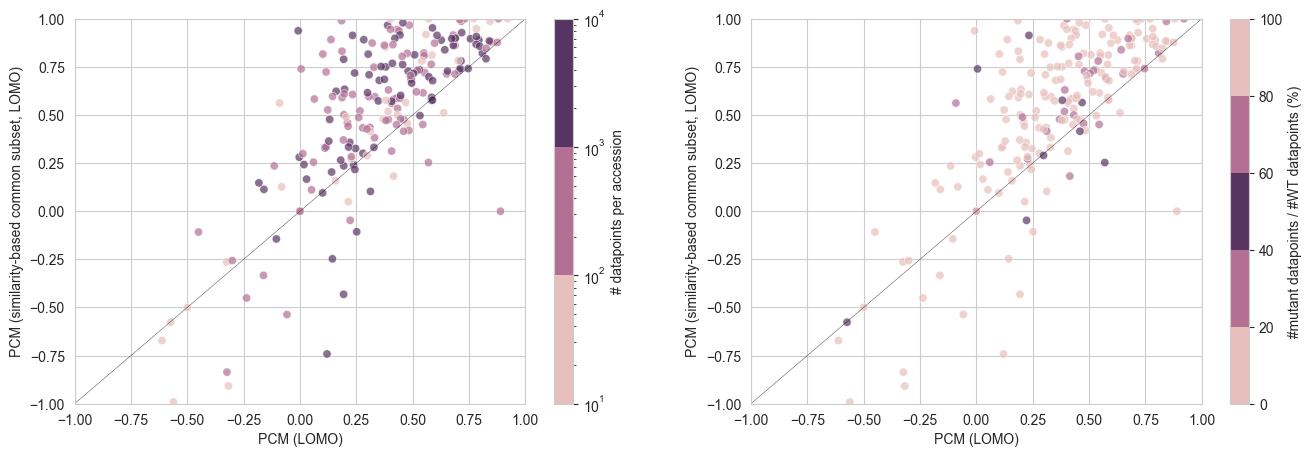

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_PCM_common_True_per_mutant',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_PCM_common_True_per_mutant',
                      hue='datapoints_mutant_percentage',
                      data=scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM (LOMO)', ylabel='PCM (similarity-based common subset, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM (LOMO)', ylabel='PCM (similarity-based common subset, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCM_vs_PCMsim_LOMO.svg'))

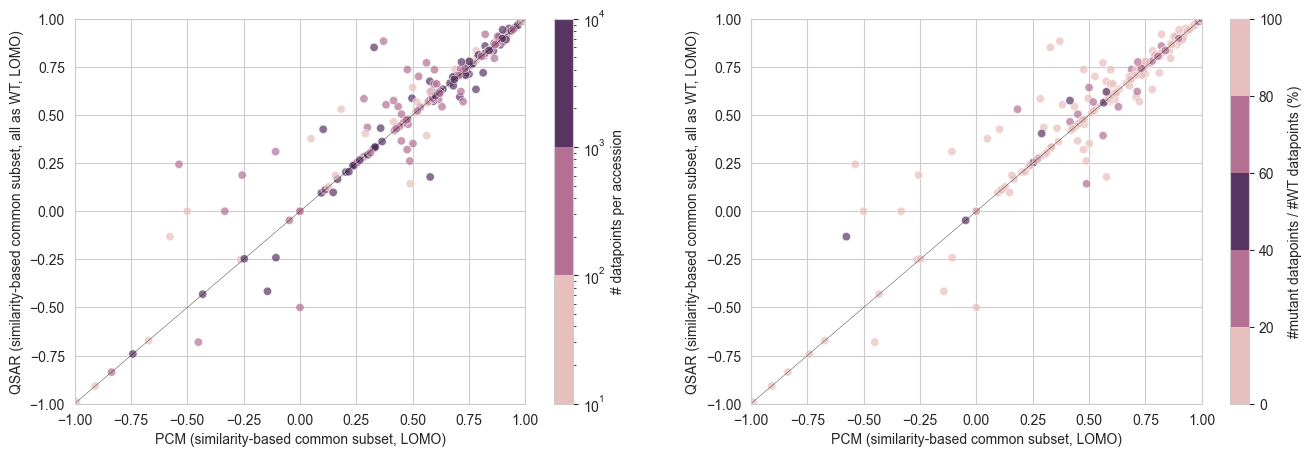

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5)) 
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::96])
div_palette = matplotlib.colors.ListedColormap(np.vstack((palette.colors, palette.colors[1::-1])))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='num_datapoints_total',
                      data=scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True),
                      palette=palette,
                      ax=axes[0])
norm1 = matplotlib.colors.LogNorm(10, 10 ** int(np.log10(scatter_data.num_datapoints_total.max())), clip=True)
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='# datapoints per accession')


ax2 = sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='datapoints_mutant_percentage',
                      data=scatter_data,
                      alpha=0.7,
                      palette=div_palette,
                      ax=axes[1])
norm2 = plt.Normalize(0, 100)
sm2 = plt.cm.ScalarMappable(cmap=div_palette,
                            norm=norm2)
ax2.get_legend().remove()
ax2.figure.colorbar(sm2, ax=ax2, label='#mutant datapoints / #WT datapoints (%)')


_ = ax1.set(xlabel='PCM (similarity-based common subset, LOMO)', ylabel='QSAR (similarity-based common subset, all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax2.set(xlabel='PCM (similarity-based common subset, LOMO)', ylabel='QSAR (similarity-based common subset, all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.PCMsim_vs_QSARsim_LOMO.svg'))

## Protein families

In [23]:
from papyrus_scripts import read_protein_set
from papyrus_scripts.preprocess import equalize_cell_size_in_column

In [24]:
proteins = read_protein_set()

In [25]:
proteins = proteins[proteins.target_id.str.endswith('_WT')].reset_index(drop=True)
proteins['accession'] = proteins.target_id.str.split('_').str[0]

In [26]:
proteins = pd.concat([proteins,
                      pd.DataFrame(equalize_cell_size_in_column(proteins.Classification.str.split('->')).tolist(), columns=[f'L{i}' for i in range(1, 7)])
                      ],
                     axis=1)

In [27]:
annotation = pd.Series([''] * proteins.shape[0])
annotation.loc[proteins.L1 == 'Ion channel'] = 'Ion Channel'
annotation.loc[proteins.L2 == 'Nuclear receptor'] = 'Nuclear Receptor'
annotation.loc[proteins.L2 == 'Family A G protein-coupled receptor'] = 'Family A GPCR'
annotation.loc[proteins.L3 == 'Protein Kinase'] = 'Protein Kinase'
proteins['color'] = annotation

In [28]:
scatter_data = scatter_data.merge(proteins, on='accession')

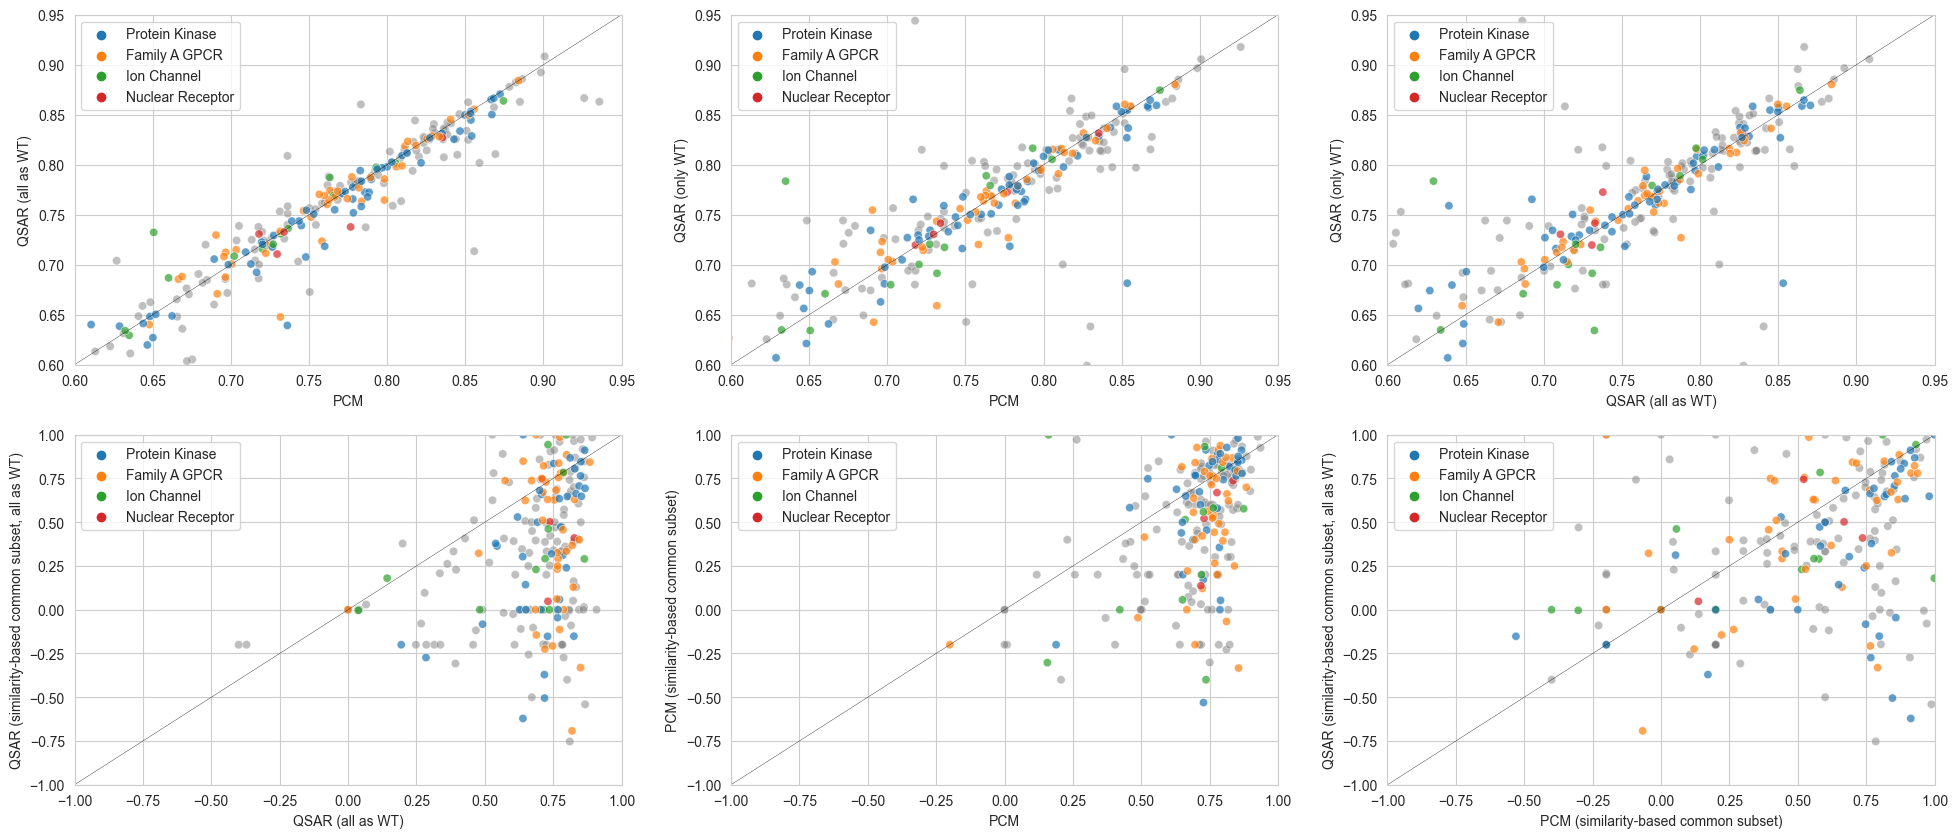

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))
palette = matplotlib.colors.ListedColormap(['grey']).colors
palette2 = sns.color_palette(as_cmap=True)[:4]


for iy, ix in np.ndindex(axes.shape):
    # Plot identity lines
    axes[iy, ix].plot(np.linspace(-100, 100, 100),
                      np.linspace(-100, 100, 100),
                      linestyle='solid', linewidth=0.25,
                      color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='color',
                      data=scatter_data[scatter_data.color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='color',
                      data=scatter_data[scatter_data.color != ''],
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[0, 0])
sns.lineplot()
ax1.legend_.set_title(None)

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='color',
                      data=scatter_data[scatter_data.color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 1])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='color',
                      data=scatter_data[scatter_data.color != ''],
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='color',
                      data=scatter_data[scatter_data.color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 2])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='color',
                      data=scatter_data[scatter_data.color != ''], 
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='color',
                      data=scatter_data[scatter_data.color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 0])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='color',
                      data=scatter_data[scatter_data.color != ''], 
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='color',
                      data=scatter_data[scatter_data.color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 1])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='color',
                      data=scatter_data[scatter_data.color != ''],
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='color',
                      data=scatter_data[scatter_data.color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 2])
sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='color',
                      data=scatter_data[scatter_data.color != ''], 
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)



_ = ax1.set(xlabel='PCM', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Protein_families.svg'))

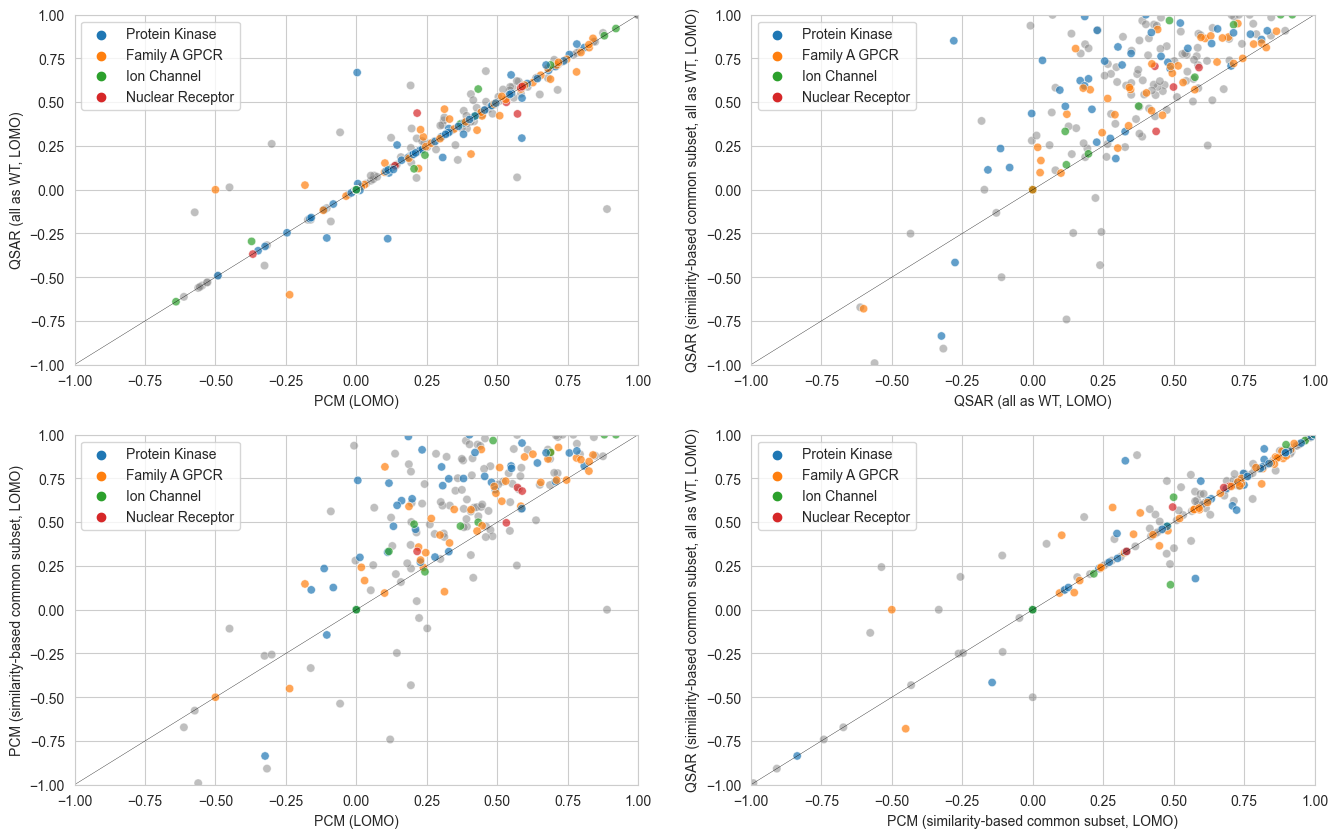

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
palette = matplotlib.colors.ListedColormap(['grey']).colors
palette2 = sns.color_palette(as_cmap=True)[:4]

# Plot identity lines
for iy, ix in np.ndindex(axes.shape):
    axes[iy, ix].plot(np.linspace(-100, 100, 100),
                      np.linspace(-100, 100, 100),
                      linestyle='solid', linewidth=0.25,
                      color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_QSAR_complete_True_per_mutant',
                      hue='color',
                      data=scatter_data[scatter_data.color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_QSAR_complete_True_per_mutant',
                      hue='color',
                      data=scatter_data[scatter_data.color != ''],
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='color',
                      data=scatter_data[scatter_data.color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 1])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='color',
                      data=scatter_data[scatter_data.color != ''], 
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)

ax3 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_PCM_common_True_per_mutant',
                      hue='color',
                      data=scatter_data[scatter_data.color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_PCM_common_True_per_mutant',
                      hue='color',
                      data=scatter_data[scatter_data.color != ''],
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[1, 0])
ax3.legend_.set_title(None)

ax4 = sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='color',
                      data=scatter_data[scatter_data.color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 1])
sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='color',
                      data=scatter_data[scatter_data.color != ''], 
                      palette=palette2,
                      alpha=0.7,
                      ax=axes[1, 1])
ax4.legend_.set_title(None)

_ = ax1.set(xlabel='PCM (LOMO)', ylabel='QSAR (all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1))
_ = ax2.set(xlabel='QSAR (all as WT, LOMO)', ylabel='QSAR (similarity-based common subset, all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax3.set(xlabel='PCM (LOMO)', ylabel='PCM (similarity-based common subset, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax4.set(xlabel='PCM (similarity-based common subset, LOMO)', ylabel='QSAR (similarity-based common subset, all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Protein_families_LOMO.svg'))

## Interesting targets

In [31]:
scatter_data.loc[(scatter_data.num_datapoints_total > 1_000) & (scatter_data.datapoints_mutant_percentage > 10), 'interesting_color'] = 'Interesting'
scatter_data.loc[~((scatter_data.num_datapoints_total > 1_000) & (scatter_data.datapoints_mutant_percentage > 10)), 'interesting_color'] = ''

In [32]:
palette_interesting = sns.color_palette(as_cmap=True)[3:4]
palette = matplotlib.colors.ListedColormap(['grey']).colors

In [33]:
def repel_labels(ax, x, y, labels, k=0.01):
    import networkx as nx
    G = nx.DiGraph()
    data_nodes = []
    init_pos = {}
    for xi, yi, label in zip(x, y, labels):
        data_str = 'data_{0}'.format(label)
        G.add_node(data_str)
        G.add_node(label)
        G.add_edge(label, data_str)
        data_nodes.append(data_str)
        init_pos[data_str] = (xi, yi)
        init_pos[label] = (xi, yi)

    pos = nx.spring_layout(G, pos=init_pos, fixed=data_nodes, k=k)

    # undo spring_layout's rescaling
    pos_after = np.vstack([pos[d] for d in data_nodes])
    pos_before = np.vstack([init_pos[d] for d in data_nodes])
    scale, shift_x = np.polyfit(pos_after[:,0], pos_before[:,0], 1)
    scale, shift_y = np.polyfit(pos_after[:,1], pos_before[:,1], 1)
    shift = np.array([shift_x, shift_y])
    for key, val in pos.items():
        pos[key] = (val*scale) + shift

    for label, data_str in G.edges():
        ax.annotate(label,
                    xy=pos[data_str], xycoords='data',
                    xytext=pos[label], textcoords='data',
                    # arrowprops=dict(arrowstyle="-",
                    #                 shrinkA=0, shrinkB=0,
                    #                 connectionstyle="arc3", 
                    #                 color='black'), 
                    )
    # expand limits
    # all_pos = np.vstack(list(pos.values()))
    # x_span, y_span = np.ptp(all_pos, axis=0)
    # mins = np.min(all_pos-x_span*0.15, 0)
    # maxs = np.max(all_pos+y_span*0.15, 0)
    # ax.set_xlim([mins[0], maxs[0]])
    # ax.set_ylim([mins[1], maxs[1]])

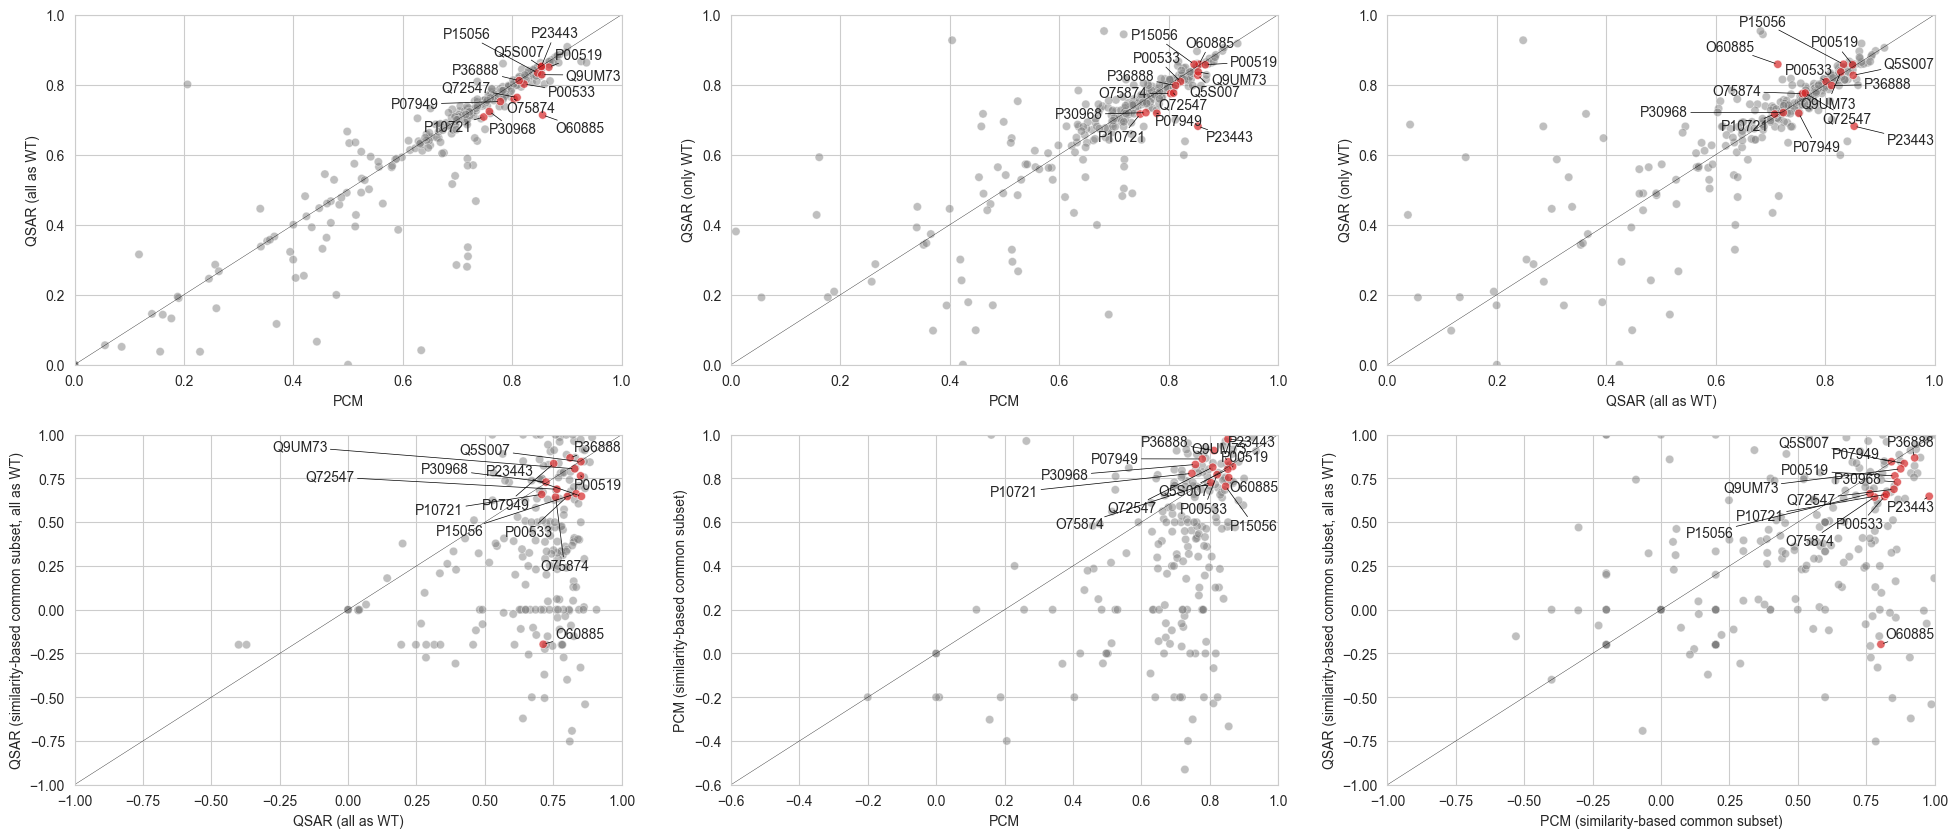

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10)) 

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='interesting_color',
                      data=scatter_data[scatter_data.interesting_color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                y='Pearson_r_QSAR_complete_True_random',
                hue='interesting_color',
                data=scatter_data[scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[0, 0])
ax1.legend_.set_title(None)


ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='interesting_color',
                      data=scatter_data[scatter_data.interesting_color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 1])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                y='Pearson_r_QSAR_complete_False_random',
                hue='interesting_color',
                data=scatter_data[scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[0, 1])
ax2.legend_.set_title(None)

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='interesting_color',
                      data=scatter_data[scatter_data.interesting_color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 2])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                y='Pearson_r_QSAR_complete_False_random',
                hue='interesting_color',
                data=scatter_data[scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[0, 2])
ax3.legend_.set_title(None)

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='interesting_color',
                      data=scatter_data[scatter_data.interesting_color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 0])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                y='Pearson_r_QSAR_common_True_random',
                hue='interesting_color',
                data=scatter_data[scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[1, 0])
ax4.legend_.set_title(None)

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='interesting_color',
                      data=scatter_data[scatter_data.interesting_color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 1])
sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                y='Pearson_r_PCM_common_True_random',
                hue='interesting_color',
                data=scatter_data[scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[1, 1])
ax5.legend_.set_title(None)

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='interesting_color',
                      data=scatter_data[scatter_data.interesting_color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 2])
sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                y='Pearson_r_QSAR_common_True_random',
                hue='interesting_color',
                data=scatter_data[scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[1, 2])
ax6.legend_.set_title(None)

_ = ax1.set(xlabel='PCM', ylabel='QSAR (all as WT)',
            xlim=(0, 1), ylim=(0, 1))
_ = ax2.set(xlabel='PCM', ylabel='QSAR (only WT)',
            xlim=(0, 1), ylim=(0, 1))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0, 1), ylim=(0, 1))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM', ylabel='PCM (similarity-based common subset)',
            xlim=(-0.6, 1), ylim=(-0.6, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )

ax1_texts = [ax1.text(x, y, s=accession)
             for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].accession.tolist())]
# ax1_empty = [ax1.text(x, y, s=' ')
#              for x, y, accession in zip(scatter_data[scatter_data.interesting_color == ''].Pearson_r_PCM_complete_True_random.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_True_random.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax1_texts,
                # x=scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                # y=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                # add_objects=ax1_empty,
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                expand_points=(1.5, 1.5),
                # only_move={'text': 'y', 'explode': 'xy', 'static': 'x', 'pull': 'x'},
                # expand_text=(2.5, 2.5),
                ax=ax1)
ax2_texts = [ax2.text(x, y, s=accession)
             for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_False_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].accession.tolist())]
# ax2_empty = [ax2.text(x, y, s=' ')
#              for x, y, accession in zip(scatter_data[scatter_data.interesting_color == ''].Pearson_r_PCM_complete_True_random.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_False_random.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax2_texts,
                # x=scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                # y=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_False_random.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # add_objects=ax2_empty,
                expand_points=(1.5, 1.5),
                expand_text=(1.1, 1.1),
                ax=ax2)
ax3_texts = [ax3.text(x, y, s=accession)
             for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_False_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].accession.tolist())]
# ax3_empty = [ax3.text(x, y, s=' ')
#              for x, y, accession in zip(scatter_data[scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_True_random.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_False_random.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax3_texts,
                # x=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                # y=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_False_random.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # add_objects=ax3_empty,
                expand_points=(1.5, 1.5),
                expand_text=(1.5, 1.5),
                ax=ax3)
ax4_texts = [ax4.text(x, y, s=accession)
             for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].accession.tolist())]
_ = adjust_text(texts=ax4_texts,
                # x=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_random.tolist(),
                # y=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_random.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                expand_points=(1.5, 1.5),
                expand_text=(1.2, 1.2),
                force_text=(1.25, 1.5),
                ax=ax4)
ax5_texts = [ax5.text(x, y, s=accession)
             for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].accession.tolist())]
# ax5_empty = [ax5.text(x, y, s=' ')
#              for x, y, accession in zip(scatter_data[scatter_data.interesting_color == ''].Pearson_r_PCM_complete_True_random.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].Pearson_r_PCM_common_True_random.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].accession.tolist())]
# 
_ = adjust_text(texts=ax5_texts,
                # x=scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                # y=scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_random.tolist(),
                # add_objects=ax5_empty,
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # expand_points=(1.5, 1.5),
                # expand_text=(2, 2),
                # force_text=(.75, .75),
                # force_points=(1.25, 1.5),
            #     force_points=0.2, force_text=0.2,
            # expand_points=(1, 1), expand_text=(1, 1),
                ax=ax5)

xs, ys, labels = zip(*[(x, y, accession) for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_random.tolist(),
                                                                    scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_random.tolist(),
                                                                    scatter_data[scatter_data.interesting_color != ''].accession.tolist())])
# repel_labels(ax5, xs, ys, labels, k=0.01)

ax6_texts = [ax6.text(x, y, s=accession)
             for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_random.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].accession.tolist())]
_ = adjust_text(texts=ax6_texts,
                # x=scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_random.tolist(),
                # y=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_random.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                expand_points=(1.5, 1.5),
                # expand_text=(1.2, 1.2),
                ax=ax6)

_ = ax1.legend([],[], frameon=False)
_ = ax2.legend([],[], frameon=False)
_ = ax3.legend([],[], frameon=False)
_ = ax4.legend([],[], frameon=False)
_ = ax5.legend([],[], frameon=False)
_ = ax6.legend([],[], frameon=False)

if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Interesting_proteins.svg'))

In [35]:
scatter_data[['Pearson_r_QSAR_complete_True_per_mutant', 'Pearson_r_QSAR_common_True_per_mutant', 'interesting_color']]

Pearson_r_QSAR_complete_True_per_mutant  \
0                                   0.546368   
1                                   0.000000   
2                                   0.390531   
3                                   0.845408   
4                                  -0.317109   
..                                       ...   
321                                -0.245944   
322                                 0.316678   
323                                 0.000000   
324                                 0.533539   
325                                 0.170306   

     Pearson_r_QSAR_common_True_per_mutant interesting_color  
0                                 0.770919                    
1                                 0.000000                    
2                                 0.625016                    
3                                 0.880659                    
4                                -0.907991                    
..                                     ...               ...  
321                                    NaN                    
322                                    NaN                    
323                               0.000000                    
324                               0.612698                    
325                               0.778368                    

[326 rows x 3 columns]

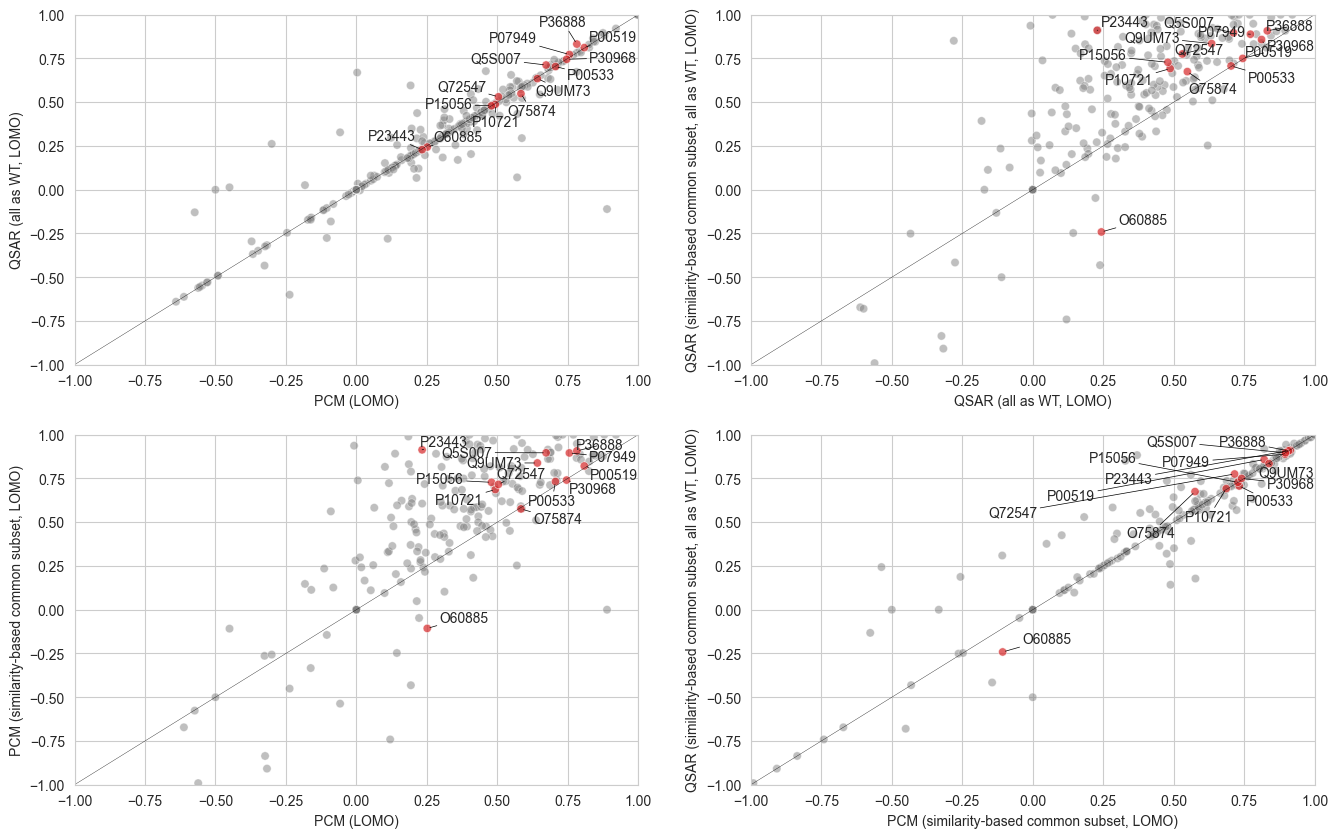

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_QSAR_complete_True_per_mutant',
                      hue='interesting_color',
                      data=scatter_data[scatter_data.interesting_color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                y='Pearson_r_QSAR_complete_True_per_mutant',
                hue='interesting_color',
                data=scatter_data[scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[0, 0])
ax1.legend_.set_title(None)


ax2 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='interesting_color',
                      data=scatter_data[scatter_data.interesting_color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[0, 1])
sns.scatterplot(x='Pearson_r_QSAR_complete_True_per_mutant',
                y='Pearson_r_QSAR_common_True_per_mutant',
                hue='interesting_color',
                data=scatter_data[scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[0, 1])
ax2.legend_.set_title(None)

ax3 = sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                      y='Pearson_r_PCM_common_True_per_mutant',
                      hue='interesting_color',
                      data=scatter_data[scatter_data.interesting_color == ''],
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 0])
sns.scatterplot(x='Pearson_r_PCM_complete_True_per_mutant',
                y='Pearson_r_PCM_common_True_per_mutant',
                hue='interesting_color',
                data=scatter_data[scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[1, 0])
ax3.legend_.set_title(None)

ax4 = sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                      y='Pearson_r_QSAR_common_True_per_mutant',
                      hue='interesting_color',
                      data=scatter_data[scatter_data.interesting_color == ''], 
                      palette=palette,
                      alpha=0.5,
                      ax=axes[1, 1])
sns.scatterplot(x='Pearson_r_PCM_common_True_per_mutant',
                y='Pearson_r_QSAR_common_True_per_mutant',
                hue='interesting_color',
                data=scatter_data[scatter_data.interesting_color != ''],
                palette=palette_interesting,
                alpha=0.7,
                ax=axes[1, 1])
ax4.legend_.set_title(None)

_ = ax1.set(xlabel='PCM (LOMO)', ylabel='QSAR (all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1))
_ = ax2.set(xlabel='QSAR (all as WT, LOMO)', ylabel='QSAR (similarity-based common subset, all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax3.set(xlabel='PCM (LOMO)', ylabel='PCM (similarity-based common subset, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax4.set(xlabel='PCM (similarity-based common subset, LOMO)', ylabel='QSAR (similarity-based common subset, all as WT, LOMO)',
            xlim=(-1, 1), ylim=(-1, 1)
            )

ax1_texts = [ax1.text(x, y, s=accession)
             for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].accession.tolist())]
# ax1_empty = [ax1.text(x, y, s=' ')
#              for x, y, accession in zip(scatter_data[scatter_data.interesting_color == ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax1_texts,
                # x=scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
                # y=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
                # add_objects=ax1_empty,
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                #expand_points=(2.4, 2.4),
                expand_points=(1.5, 1.5),
                # expand_text=(1.5, 1.5),
                ax=ax1)
ax2_texts = [ax2.text(x, y, s=accession)
             for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_per_mutant.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].accession.tolist())]
# ax2_empty = [ax2.text(x, y, s=' ')
#              for x, y, accession in zip(scatter_data[scatter_data.interesting_color == ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].Pearson_r_QSAR_common_True_per_mutant.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax2_texts,
                # x=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_complete_True_per_mutant.tolist(),
                # y=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_per_mutant.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # add_objects=ax2_empty,
                expand_points=(1.7, 1.7),
                # expand_text=(1.5, 1.5),
                ax=ax2)
ax3_texts = [ax3.text(x, y, s=accession)
             for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_per_mutant.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].accession.tolist())]
# ax3_empty = [ax3.text(x, y, s=' ')
#              for x, y, accession in zip(scatter_data[scatter_data.interesting_color == ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].Pearson_r_PCM_common_True_per_mutant.tolist(),
#                                         scatter_data[scatter_data.interesting_color == ''].accession.tolist())]
_ = adjust_text(texts=ax3_texts,
                # x=scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_complete_True_per_mutant.tolist(),
                # y=scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_per_mutant.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # add_objects=ax3_empty,
                expand_points=(1.5, 1.5),
                #expand_points=(2.2, 2.2),
                # expand_text=(1.5, 1.5),
                ax=ax3)
ax4_texts = [ax4.text(x, y, s=accession)
             for x, y, accession in zip(scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_per_mutant.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_per_mutant.tolist(),
                                        scatter_data[scatter_data.interesting_color != ''].accession.tolist())]
_ = adjust_text(texts=ax4_texts,
                # x=scatter_data[scatter_data.interesting_color != ''].Pearson_r_PCM_common_True_per_mutant.tolist(),
                # y=scatter_data[scatter_data.interesting_color != ''].Pearson_r_QSAR_common_True_per_mutant.tolist(),
                arrowprops=dict(arrowstyle="-", color='k', lw=0.5),
                # expand_points=(2., 2.),
                expand_points=(1.8, 1.8),
                expand_text=(1.2, 1.2),
                ax=ax4)

ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)
ax3.legend([],[], frameon=False)
ax4.legend([],[], frameon=False)

if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Interesting_proteins_LOMO.svg'))

In [37]:
scatter_data[scatter_data.interesting_color != ''][['Pearson_r_PCM_common_True_per_mutant', 'Pearson_r_QSAR_common_True_per_mutant', 'accession']]

Pearson_r_PCM_common_True_per_mutant  \
25                              -0.106666   
27                               0.576024   
37                               0.821393   
40                               0.732436   
69                               0.895865   
87                               0.686749   
104                              0.728069   
128                              0.913674   
150                              0.740890   
171                              0.907602   
267                              0.896680   
271                              0.716344   
320                              0.838538   

     Pearson_r_QSAR_common_True_per_mutant accession  
25                               -0.241381    O60885  
27                                0.674911    O75874  
37                                0.858331    P00519  
40                                0.707337    P00533  
69                                0.888695    P07949  
87                                0.692262    P10721  
104                               0.728069    P15056  
128                               0.910850    P23443  
150                               0.750443    P30968  
171                               0.908089    P36888  
267                               0.896680    Q5S007  
271                               0.775609    Q72547  
320                               0.835105    Q9UM73

## Differences in bioactivity

In [38]:
# TODO: change path of stats to generic, as they are created in main.py

In [39]:
stats = pd.read_csv('C:/Users/ojbeq/Downloads/stats_file_All.txt', sep='\t')
stats_var = pd.read_csv('C:/Users/ojbeq/Downloads/stats_per_variant_round2.txt', sep='\t')

Obtain color scales of he next plots:
- `avg_WT`: the average pchembl value of WT proteins only
- `weighted_avg_all`: the weighted average of pchembl value (weighted by number of datapoints for each variant)
- `abs_weighted_diff`: the absolute difference between the weighted average of the mutants pchembl values and the average pchembl values of the corresponding WT accession
- `abs_diff`: the absolute difference betwen the **un**weighted average of the mutants pchembl values and the average pchembl values of the corresponding WT accession
- `max_abs_diff`: the maximum absolute difference between the average pchembl value of mutants and the average of the pchembl of their corresponding WT accession

In [40]:
# Obtain the average pchembl of the WT proteins only
avg_WT = stats[stats.target_id.str.endswith('_WT')][['accession', 'mean_pchembl']].set_index('accession')

In [41]:
# Obtain weighted mean of all variants (including WT)
stats_datapoints = pd.concat([stats_var[['accession', 'variant', 'connectivity_variant_percentage']].set_index('variant'),
                              stats[['target_id', 'mean_pchembl']].set_index('target_id'),
                              ],
                             axis=1)
# Define a lambda function to compute the weighted mean:
weighted_mean = lambda x: np.average(x, weights=stats_datapoints.loc[x.index, "connectivity_variant_percentage"])

# Group by accession and calculate weighted average of pchembl value
weighted_avg_all = stats_datapoints.groupby(["accession"]).agg(pchembl_weighted_mean=("mean_pchembl", weighted_mean))

In [42]:
# Obtain weighted of mutants only (no WT)
mutant_datapoints = pd.concat([stats_var[~stats_var.variant.str.endswith('_WT')][['accession', 'variant', 'connectivity_variant_percentage']].set_index('variant'),
                               stats[~stats.target_id.str.endswith('_WT')][['target_id', 'mean_pchembl']].set_index('target_id'),
                               ],
                              axis=1)
# Define a lambda function to compute the weighted mean:
weighted_mean_var = lambda x: np.average(x, weights=mutant_datapoints.loc[x.index, "connectivity_variant_percentage"])

# Group by accession and calculate weighted average of pchembl value
weighted_pchembl_var = mutant_datapoints.groupby(["accession"]).agg(pchembl_weighted_mean=("mean_pchembl", weighted_mean_var))

# Obtain deviation to WT
abs_weighted_diff = (pd.concat([weighted_pchembl_var,
                                        stats[stats.target_id.str.endswith('_WT')][['accession', 'mean_pchembl']].set_index('accession')],
                                       axis=1).dropna()
                             .diff(axis=1)
                             .iloc[:, 1:]
                             .abs()
                             .rename(columns={'mean_pchembl': 'abs_weighted_diff_pchembl_mutant-WT'})
                             )

In [43]:
# Obtain deviation to WT (first group by accession and calculate average of pchembl value)
abs_diff = (pd.concat([mutant_datapoints.groupby(["accession"]).agg(pchembl_mean=("mean_pchembl", "mean")),
                                        stats[stats.target_id.str.endswith('_WT')][['accession', 'mean_pchembl']].set_index('accession')],
                                       axis=1).dropna()
                             .diff(axis=1)
                             .iloc[:, 1:]
                             .abs()
                             .rename(columns={'mean_pchembl': 'abs_diff_pchembl_mutant-WT'})
                             )

In [44]:
# Obtain the maximum deviation to WT (no grouping by accession)
max_abs_diff = (stats[~stats.target_id.str.endswith('_WT')][['accession', 'target_id', 'mean_pchembl']]
                .rename(columns={'mean_pchembl': 'mean_pchembl_mutant'})
                .merge(stats[stats.target_id.str.endswith('_WT')][['accession', 'mean_pchembl']]
                        .rename(columns={'mean_pchembl': 'mean_pchembl_WT'}),
                       on='accession')
                )
max_abs_diff['max_abs_diff_pchembl_mutant-WT'] = (max_abs_diff.mean_pchembl_mutant - max_abs_diff.mean_pchembl_WT).abs()
max_abs_diff = (max_abs_diff.drop(columns=['mean_pchembl_mutant', 'mean_pchembl_WT'])
                .groupby('accession')
                .agg({'max_abs_diff_pchembl_mutant-WT': 'max'})
                )

In [45]:
annotations = pd.concat([avg_WT,
                         weighted_avg_all,
                         abs_weighted_diff,
                         abs_diff,
                         max_abs_diff],
                        axis=1)

In [46]:
annotated_scatter_data = scatter_data.merge(annotations, on='accession')

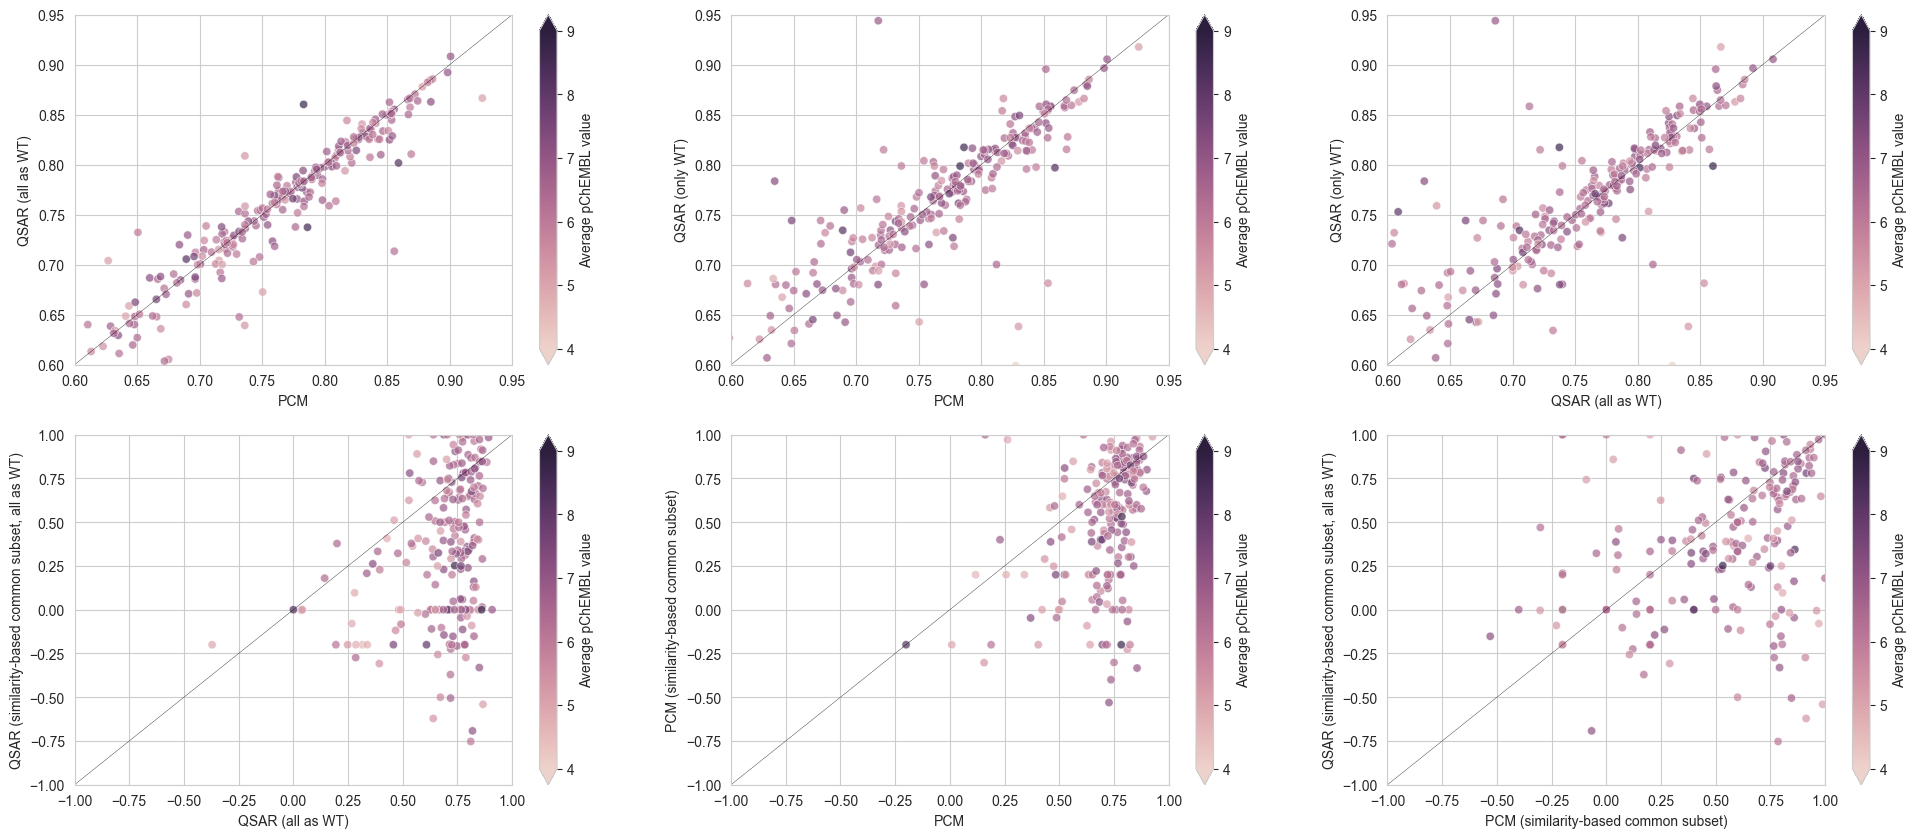

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')
 
ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)
norm1 = matplotlib.colors.Normalize(4, 9)
sm1 = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True),
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Average pChEMBL value', extend='both')

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)
ax2.get_legend().remove()
ax2.figure.colorbar(sm1, ax=ax2, label='Average pChEMBL value', extend='both')

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)
ax3.get_legend().remove()
ax3.figure.colorbar(sm1, ax=ax3, label='Average pChEMBL value', extend='both')

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)
ax4.get_legend().remove()
ax4.figure.colorbar(sm1, ax=ax4, label='Average pChEMBL value', extend='both')

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)
ax5.get_legend().remove()
ax5.figure.colorbar(sm1, ax=ax5, label='Average pChEMBL value', extend='both')

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='mean_pchembl',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)
ax6.get_legend().remove()
ax6.figure.colorbar(sm1, ax=ax6, label='Average pChEMBL value', extend='both')

_ = ax1.set(xlabel='PCM', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Average_pChEMBL_value.svg'))

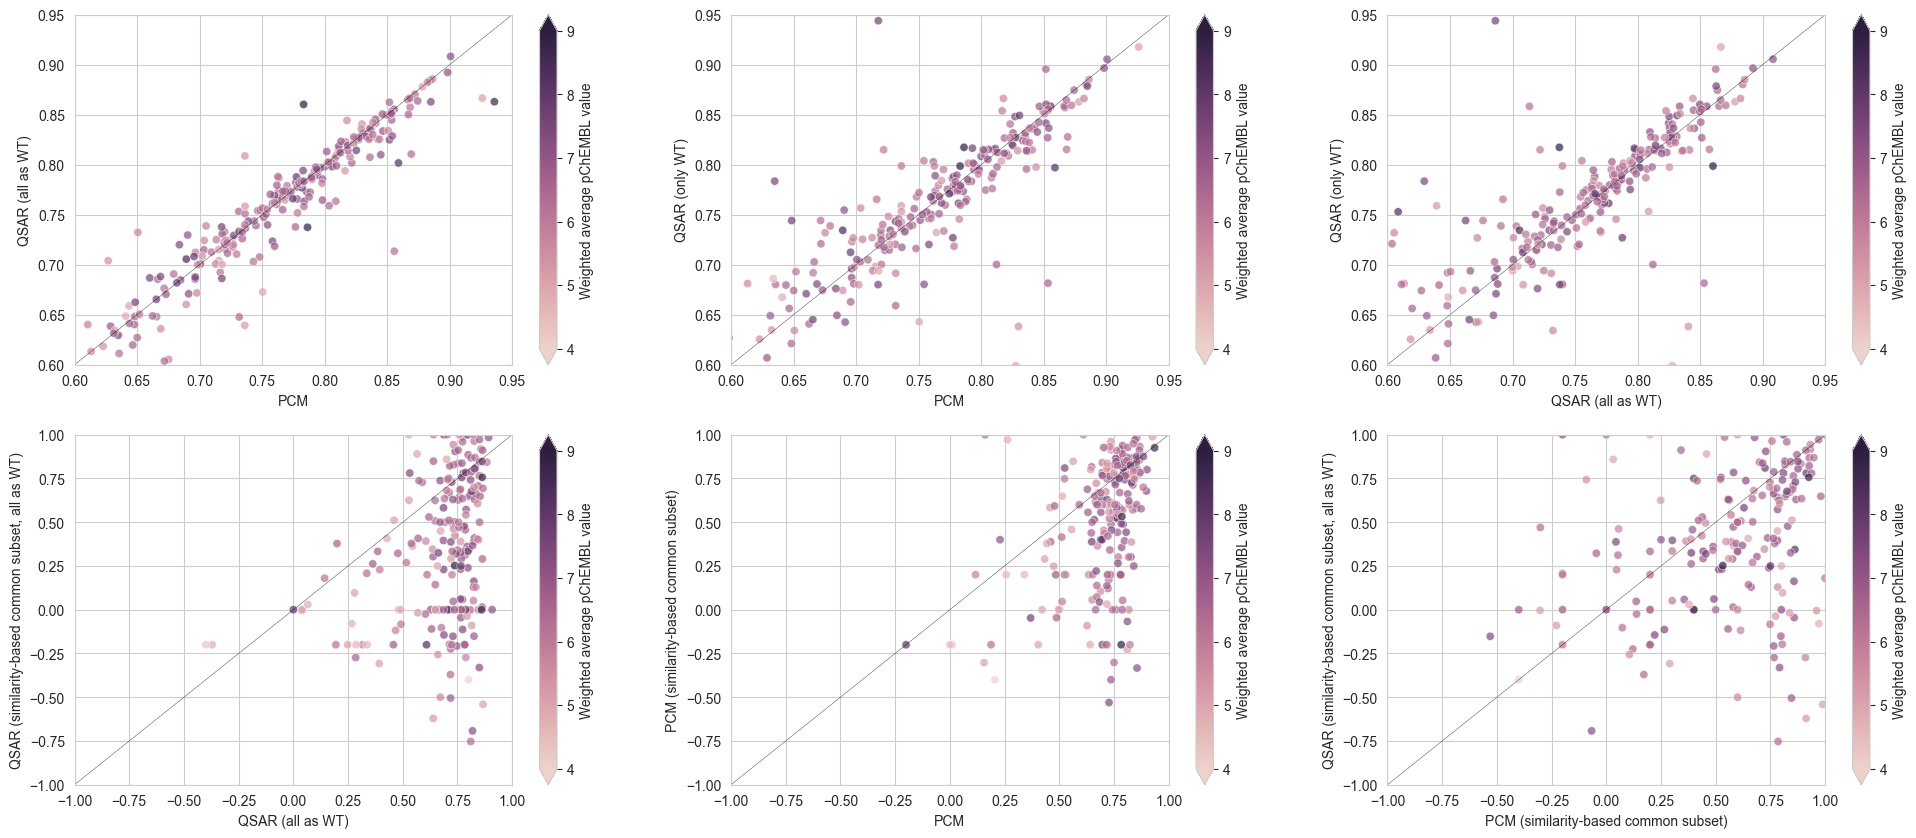

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10)) 

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)
norm1 = matplotlib.colors.Normalize(4, 9)
sm1 = plt.cm.ScalarMappable(cmap=sns.cubehelix_palette(as_cmap=True),
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='Weighted average pChEMBL value', extend='both')

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)
ax2.get_legend().remove()
ax2.figure.colorbar(sm1, ax=ax2, label='Weighted average pChEMBL value', extend='both')

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)
ax3.get_legend().remove()
ax3.figure.colorbar(sm1, ax=ax3, label='Weighted average pChEMBL value', extend='both')

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)
ax4.get_legend().remove()
ax4.figure.colorbar(sm1, ax=ax4, label='Weighted average pChEMBL value', extend='both')

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)
ax5.get_legend().remove()
ax5.figure.colorbar(sm1, ax=ax5, label='Weighted average pChEMBL value', extend='both')

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='pchembl_weighted_mean',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)
ax6.get_legend().remove()
ax6.figure.colorbar(sm1, ax=ax6, label='Weighted average pChEMBL value', extend='both')

_ = ax1.set(xlabel='PCM', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Weighted_average_pChEMBL_value.svg'))

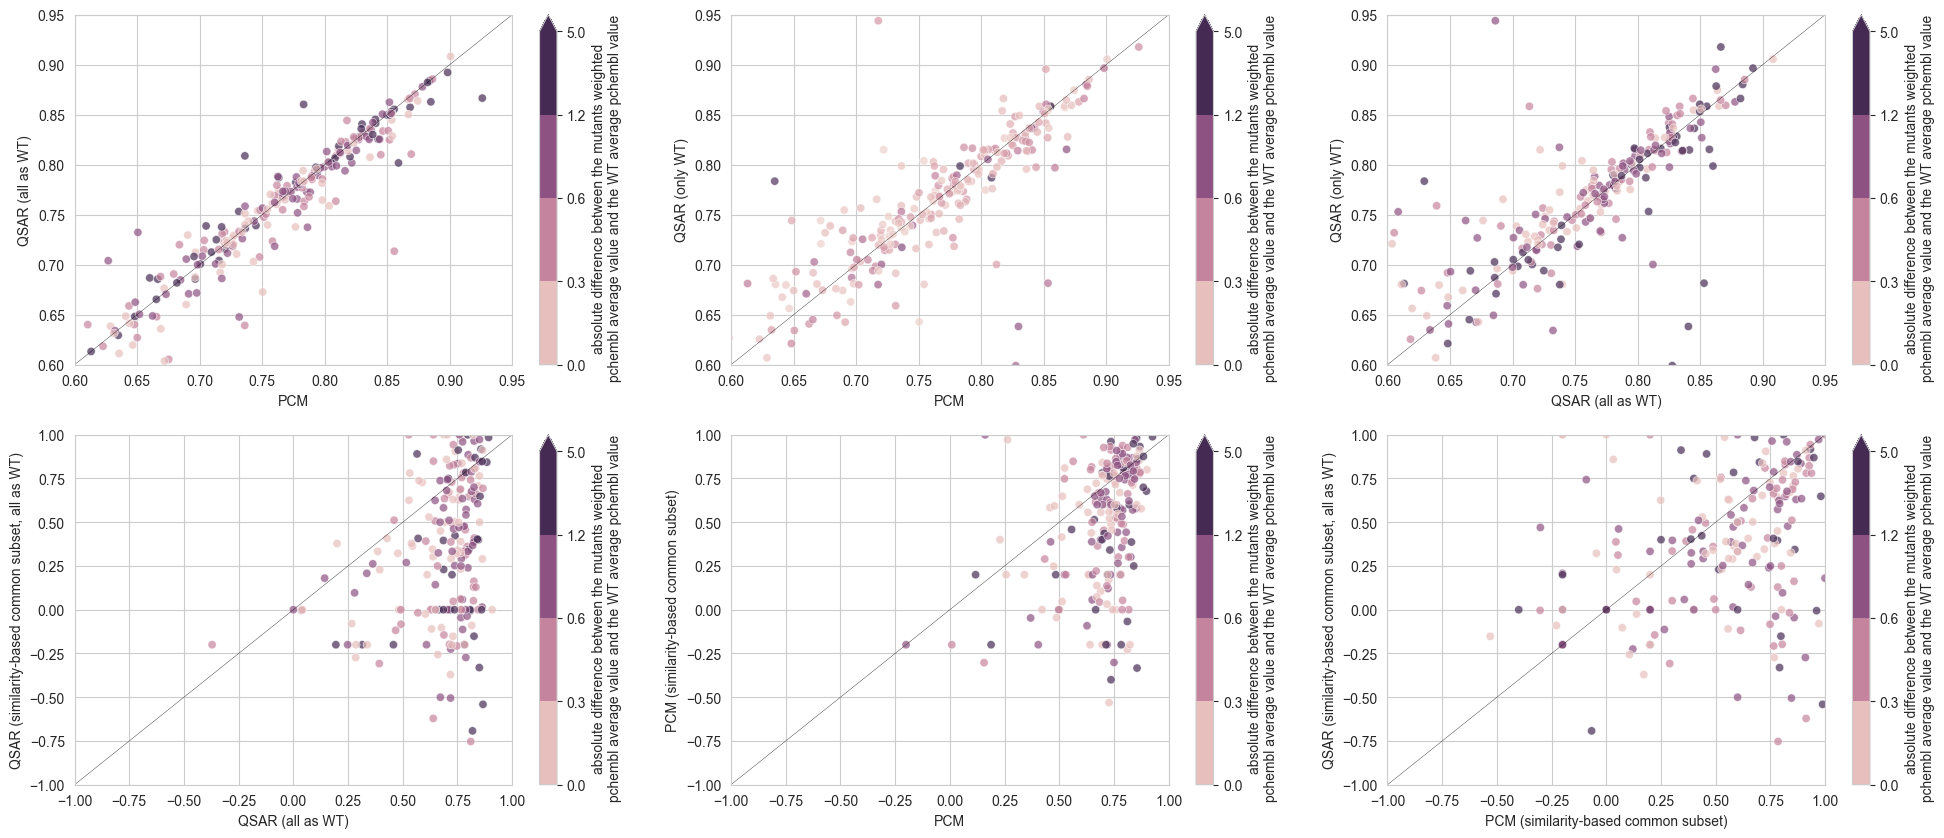

In [49]:
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::70])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)
norm1 = matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max')
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)
ax2.get_legend().remove()
ax2.figure.colorbar(sm1, ax=ax2, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)
ax3.get_legend().remove()
ax3.figure.colorbar(sm1, ax=ax3, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)
ax4.get_legend().remove()
ax4.figure.colorbar(sm1, ax=ax4, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)
ax5.get_legend().remove()
ax5.figure.colorbar(sm1, ax=ax5, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='abs_weighted_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)
ax6.get_legend().remove()
ax6.figure.colorbar(sm1, ax=ax6, label='absolute difference between the mutants weighted\npchembl average value and the WT average pchembl value')

_ = ax1.set(xlabel='PCM', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Abs_difference_weighted_average_pChEMBL_value.svg'))

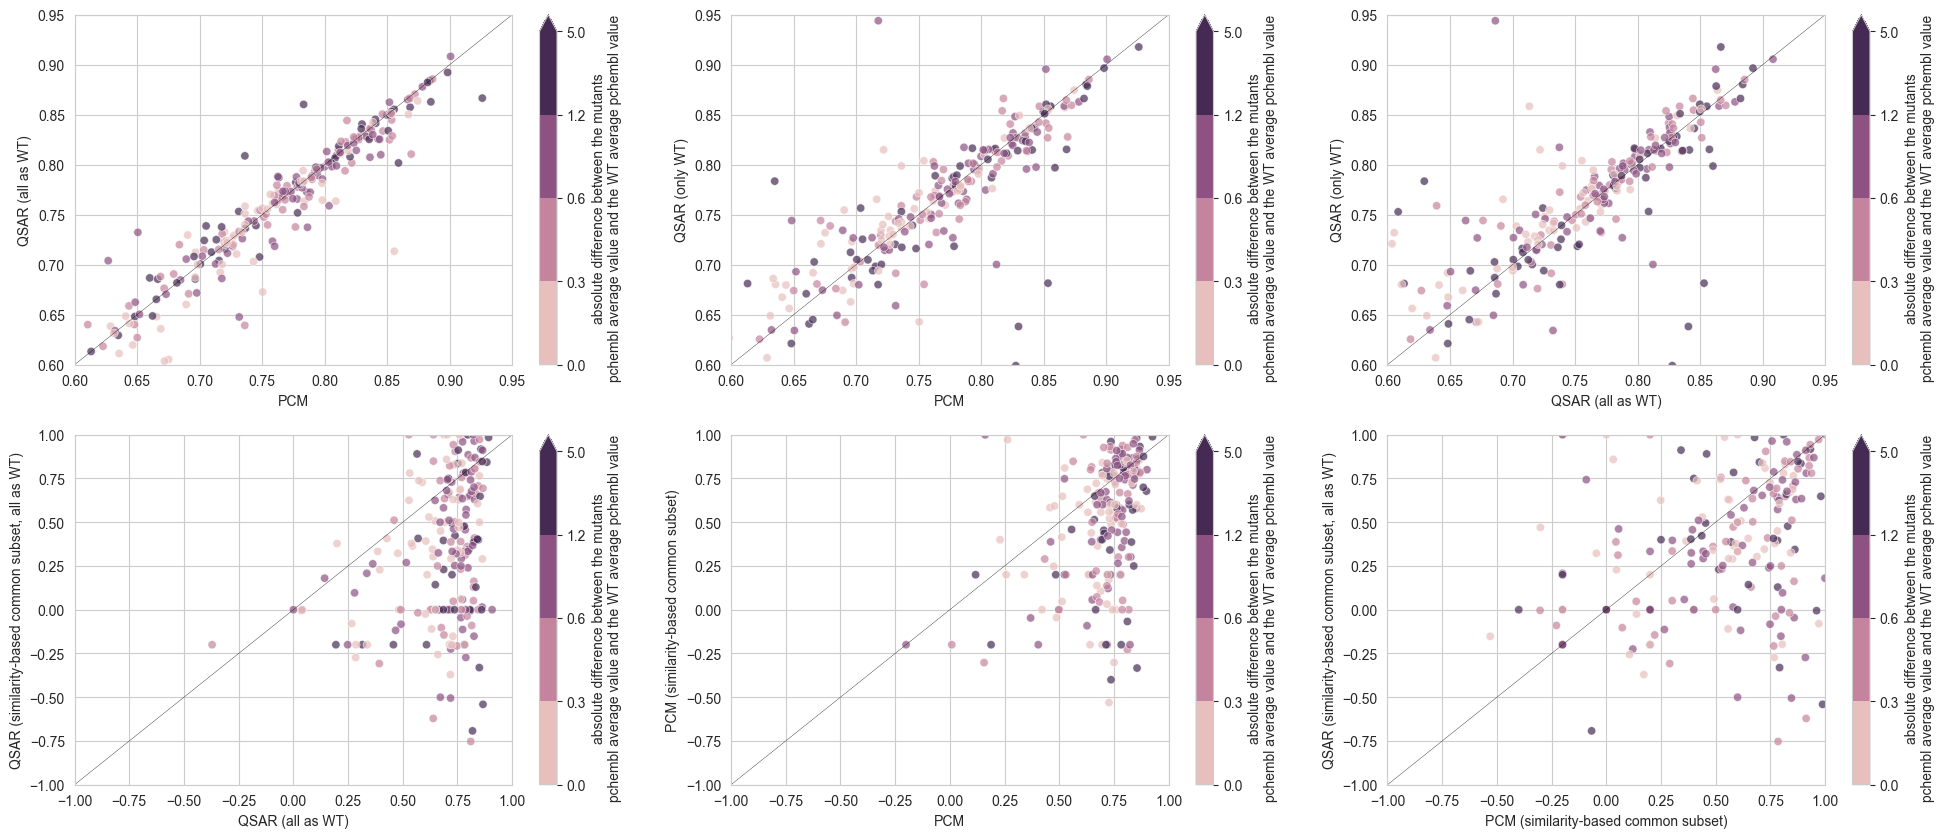

In [50]:
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::70])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10))

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)
norm1 = matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max')
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)
ax2.get_legend().remove()
ax2.figure.colorbar(sm1, ax=ax2, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)
ax3.get_legend().remove()
ax3.figure.colorbar(sm1, ax=ax3, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)
ax4.get_legend().remove()
ax4.figure.colorbar(sm1, ax=ax4, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)
ax5.get_legend().remove()
ax5.figure.colorbar(sm1, ax=ax5, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      hue_norm=matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max'),
                      palette=palette,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)
ax6.get_legend().remove()
ax6.figure.colorbar(sm1, ax=ax6, label='absolute difference between the mutants\npchembl average value and the WT average pchembl value')

_ = ax1.set(xlabel='PCM', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Abs_difference_average_pChEMBL_value.svg'))

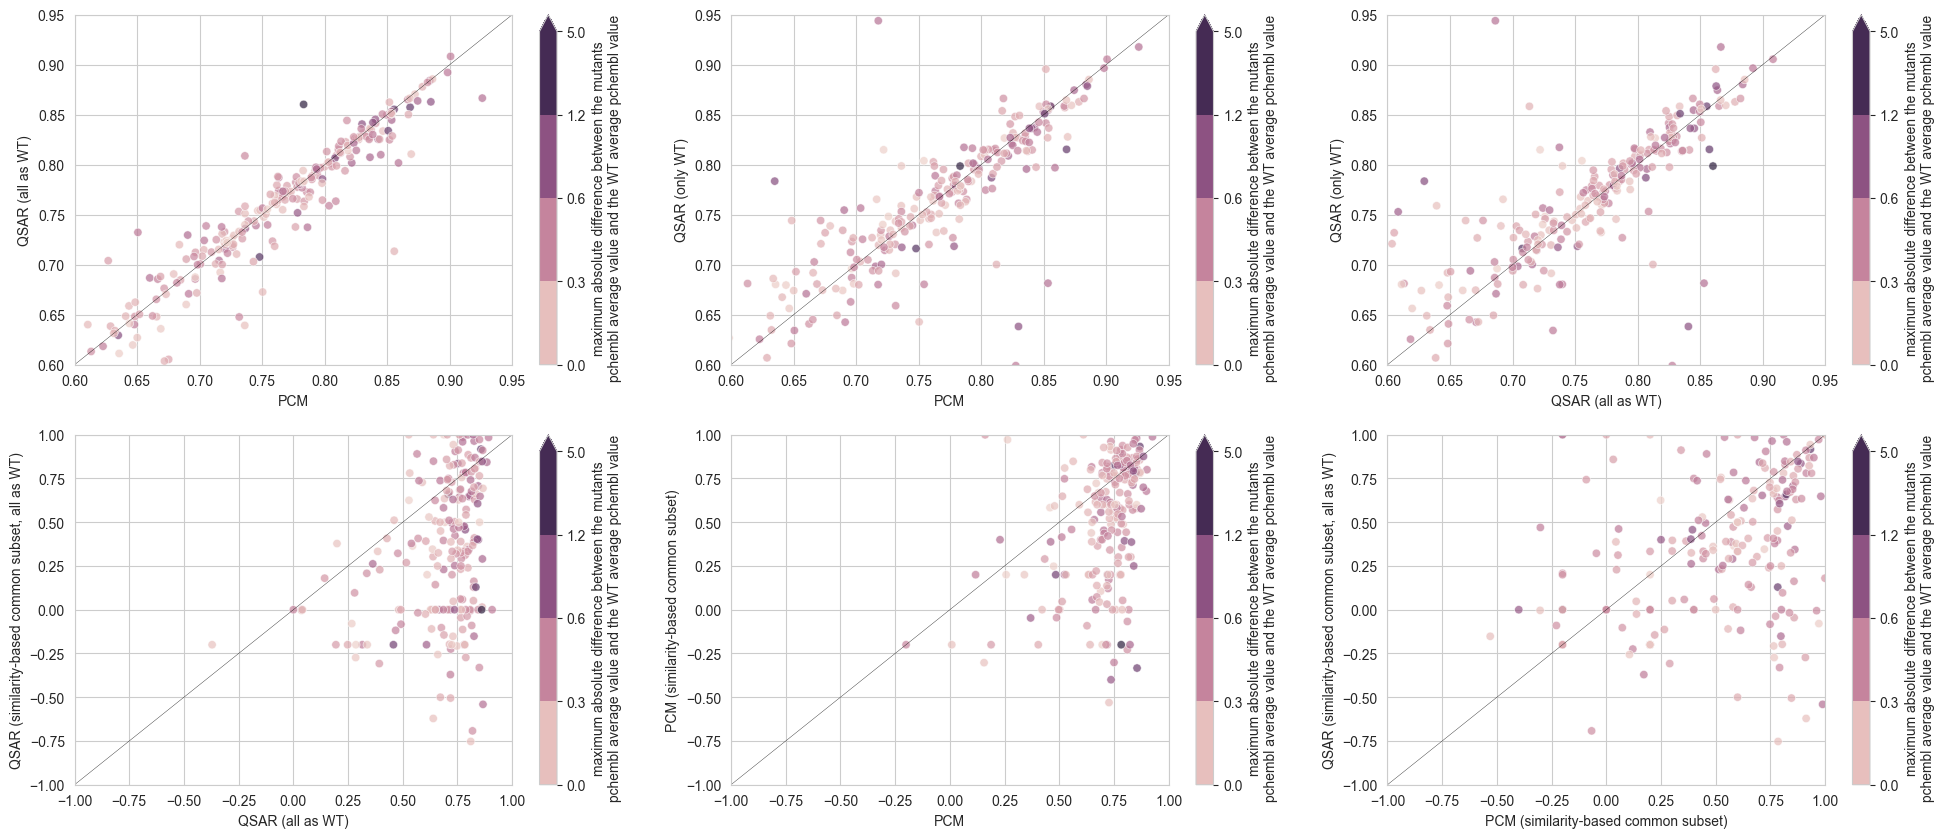

In [51]:
palette = matplotlib.colors.ListedColormap(sns.cubehelix_palette(as_cmap=True).colors[20::70])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 10)) 

# Plot identity lines
for iy in np.ndindex(axes.shape):
    axes[iy].plot(np.linspace(-100, 100, 100),
                  np.linspace(-100, 100, 100),
                  linestyle='solid', linewidth=0.25,
                  color='black')

ax1 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_True_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 0])
ax1.legend_.set_title(None)
norm1 = matplotlib.colors.BoundaryNorm(boundaries=[0, 0.3, 0.6, 1.2, 5], ncolors=5, extend='max')
sm1 = plt.cm.ScalarMappable(cmap=palette,
                            norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm1, ax=ax1, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax2 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[0, 1])
ax2.legend_.set_title(None)
ax2.get_legend().remove()
ax2.figure.colorbar(sm1, ax=ax2, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax3 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_complete_False_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[0, 2])
ax3.legend_.set_title(None)
ax3.get_legend().remove()
ax3.figure.colorbar(sm1, ax=ax3, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax4 = sns.scatterplot(x='Pearson_r_QSAR_complete_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[1, 0])
ax4.legend_.set_title(None)
ax4.get_legend().remove()
ax4.figure.colorbar(sm1, ax=ax4, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax5 = sns.scatterplot(x='Pearson_r_PCM_complete_True_random',
                      y='Pearson_r_PCM_common_True_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data,
                      alpha=0.7,
                      ax=axes[1, 1])
ax5.legend_.set_title(None)
ax5.get_legend().remove()
ax5.figure.colorbar(sm1, ax=ax5, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

ax6 = sns.scatterplot(x='Pearson_r_PCM_common_True_random',
                      y='Pearson_r_QSAR_common_True_random',
                      hue='max_abs_diff_pchembl_mutant-WT',
                      data=annotated_scatter_data, 
                      alpha=0.7,
                      ax=axes[1, 2])
ax6.legend_.set_title(None)
ax6.get_legend().remove()
ax6.figure.colorbar(sm1, ax=ax6, label='maximum absolute difference between the mutants\npchembl average value and the WT average pchembl value')

_ = ax1.set(xlabel='PCM', ylabel='QSAR (all as WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax2.set(xlabel='PCM', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax3.set(xlabel='QSAR (all as WT)', ylabel='QSAR (only WT)',
            xlim=(0.6, 0.95), ylim=(0.6, 0.95))
_ = ax4.set(xlabel='QSAR (all as WT)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax5.set(xlabel='PCM', ylabel='PCM (similarity-based common subset)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
_ = ax6.set(xlabel='PCM (similarity-based common subset)', ylabel='QSAR (similarity-based common subset, all as WT)',
            xlim=(-1, 1), ylim=(-1, 1)
            )
if save_plots:
    plt.savefig(os.path.join(output_plot_dir, 'Scatter_plot.Max_abs_difference_weighted_average_pChEMBL_value.svg'))

## Summarize statistics

In [52]:
accession_mapping = (pd.DataFrame((scatter_data[(scatter_data.num_datapoints_total > 1_000) &
                                                (scatter_data.datapoints_mutant_percentage > 10)]
                                   [['accession', 'HGNC_symbol',
                                     'UniProtID', 'Organism']]
                                   .apply(lambda x: (x.get('accession'),
                                                     x.get('accession') + ' (' + (x.get('HGNC_symbol').split(';')[0]
                                                                                  if x.get('HGNC_symbol')
                                                                                  else x.get('UniProtID').split('_')[1]) + ')'
                                                     ),
                                          axis=1)
                                   )
                                 .tolist())
                                 .set_index(0)
                                 .to_dict(orient='dict')[1])

In [53]:
((pd.concat([(scatter_data[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
                           'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
            (scatter_data[scatter_data.color != '']
             .groupby('color')
             [['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (scatter_data[(scatter_data.num_datapoints_total > 1_000) &
                         (scatter_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             [['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 
 .rename(index={'Pearson_r_PCM_complete_True_random': 'PCM',
                'Pearson_r_QSAR_complete_True_random': 'QSAR (all as WT)',
                'Pearson_r_QSAR_complete_False_random': 'QSAR (only WT)'})
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants']))

PCM  QSAR (all as WT)  QSAR (only WT)  \
All               0.652703          0.634195        0.654069   
Family A GPCR     0.731367          0.735095        0.752139   
Ion Channel       0.619946          0.612945        0.645565   
Nuclear Receptor  0.704350          0.690414        0.713582   
Protein Kinase    0.715627          0.701061        0.699764   
P00533 (EGFR)     0.821720          0.801845        0.808886   
Q72547 (9HIV1)    0.808954          0.763560        0.776118   
P00519 (ABL1)     0.867009          0.850166        0.857099   
P15056 (BRAF)     0.846614          0.833674        0.858403   
P36888 (FLT3)     0.812732          0.811718        0.797733   
O60885 (BRD4)     0.855709          0.713501        0.858399   
P10721 (KIT)      0.747979          0.707750        0.716190   
Q5S007 (LRRK2)    0.853226          0.851352        0.826960   
Q9UM73 (ALK)      0.854113          0.828737        0.836689   
P23443 (RPS6KB1)  0.853504          0.853167        0.681547   
O75874 (IDH1)     0.803567          0.758950        0.774665   
P07949 (RET)      0.778386          0.751887        0.718465   
P30968 (GNRHR)    0.758313          0.723540        0.720238   

                  num_datapoints_total  ratio_mutants  
All                           453660.0       5.484283  
Family A GPCR                  93454.0       1.794466  
Ion Channel                    16635.0       1.472798  
Nuclear Receptor               14344.0       2.502789  
Protein Kinase                133396.0       9.123212  
P00533 (EGFR)                  13601.0      18.366297  
Q72547 (9HIV1)                  6953.0      33.985330  
P00519 (ABL1)                   4985.0      22.326981  
P15056 (BRAF)                   4740.0      60.274262  
P36888 (FLT3)                   4390.0      11.776765  
O60885 (BRD4)                   4106.0      17.072577  
P10721 (KIT)                    2897.0      19.433897  
Q5S007 (LRRK2)                  2760.0      33.985507  
Q9UM73 (ALK)                    2598.0      24.942263  
P23443 (RPS6KB1)                2286.0      55.205599  
O75874 (IDH1)                   2203.0      86.291421  
P07949 (RET)                    2123.0      13.235987  
P30968 (GNRHR)                  1921.0      23.737637

In [58]:
((pd.concat([(scatter_data[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
                           'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_random': 'std',
                   'Pearson_r_QSAR_complete_True_random': 'std',
                   'Pearson_r_QSAR_complete_False_random': 'std',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
            (scatter_data[scatter_data.color != '']
             .groupby('color')
             [['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_random': 'std',
                   'Pearson_r_QSAR_complete_True_random': 'std',
                   'Pearson_r_QSAR_complete_False_random': 'std',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (scatter_data[(scatter_data.num_datapoints_total > 1_000) &
                         (scatter_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             [['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_random': 'std',
                   'Pearson_r_QSAR_complete_True_random': 'std',
                   'Pearson_r_QSAR_complete_False_random': 'std',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 
 .rename(index={'Pearson_r_PCM_complete_True_random': 'PCM',
                'Pearson_r_QSAR_complete_True_random': 'QSAR (all as WT)',
                'Pearson_r_QSAR_complete_False_random': 'QSAR (only WT)'})
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants']))

PCM  QSAR (all as WT)  QSAR (only WT)  \
All               0.244205          0.259502        0.269019   
Family A GPCR     0.160231          0.133544        0.071785   
Ion Channel       0.199968          0.228444        0.169676   
Nuclear Receptor  0.102358          0.108060        0.087478   
Protein Kinase    0.143479          0.154133        0.179132   
P00533 (EGFR)          NaN               NaN             NaN   
Q72547 (9HIV1)         NaN               NaN             NaN   
P00519 (ABL1)          NaN               NaN             NaN   
P15056 (BRAF)          NaN               NaN             NaN   
P36888 (FLT3)          NaN               NaN             NaN   
O60885 (BRD4)          NaN               NaN             NaN   
P10721 (KIT)           NaN               NaN             NaN   
Q5S007 (LRRK2)         NaN               NaN             NaN   
Q9UM73 (ALK)           NaN               NaN             NaN   
P23443 (RPS6KB1)       NaN               NaN             NaN   
O75874 (IDH1)          NaN               NaN             NaN   
P07949 (RET)           NaN               NaN             NaN   
P30968 (GNRHR)         NaN               NaN             NaN   

                  num_datapoints_total  ratio_mutants  
All                           453660.0       5.484283  
Family A GPCR                  93454.0       1.794466  
Ion Channel                    16635.0       1.472798  
Nuclear Receptor               14344.0       2.502789  
Protein Kinase                133396.0       9.123212  
P00533 (EGFR)                  13601.0      18.366297  
Q72547 (9HIV1)                  6953.0      33.985330  
P00519 (ABL1)                   4985.0      22.326981  
P15056 (BRAF)                   4740.0      60.274262  
P36888 (FLT3)                   4390.0      11.776765  
O60885 (BRD4)                   4106.0      17.072577  
P10721 (KIT)                    2897.0      19.433897  
Q5S007 (LRRK2)                  2760.0      33.985507  
Q9UM73 (ALK)                    2598.0      24.942263  
P23443 (RPS6KB1)                2286.0      55.205599  
O75874 (IDH1)                   2203.0      86.291421  
P07949 (RET)                    2123.0      13.235987  
P30968 (GNRHR)                  1921.0      23.737637

In [54]:
(pd.concat([scatter_data,
           pd.cut(scatter_data.num_datapoints_total, bins=(5, 100, 500, 2000, 20500), include_lowest=True).rename('cut_num_datapoints_total'),
           # pd.cut(scatter_data.balance_coeff, bins=(0, 1/3, 2/3, 1.0)).rename('cut_balance_coeff')
           ],
          axis=1)
 # .assign(count=1)
 .groupby(['cut_num_datapoints_total'])#, 'cut_balance_coeff'])
 .agg({'Pearson_r_PCM_complete_True_random': 'mean',
       'Pearson_r_QSAR_complete_True_random': 'mean',
       'Pearson_r_QSAR_complete_False_random': 'mean',
       'num_datapoints_total': 'sum',
       'num_datapoints_mutants': 'sum'
       })
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants'])
 .round(3)
 )

Pearson_r_PCM_complete_True_random  \
cut_num_datapoints_total                                       
(4.999, 100.0]                                         0.396   
(100.0, 500.0]                                         0.704   
(500.0, 2000.0]                                        0.746   
(2000.0, 20500.0]                                      0.769   

                          Pearson_r_QSAR_complete_True_random  \
cut_num_datapoints_total                                        
(4.999, 100.0]                                          0.352   
(100.0, 500.0]                                          0.690   
(500.0, 2000.0]                                         0.737   
(2000.0, 20500.0]                                       0.763   

                          Pearson_r_QSAR_complete_False_random  \
cut_num_datapoints_total                                         
(4.999, 100.0]                                           0.363   
(100.0, 500.0]                                           0.691   
(500.0, 2000.0]                                          0.747   
(2000.0, 20500.0]                                        0.764   

                          num_datapoints_total  ratio_mutants  
cut_num_datapoints_total                                       
(4.999, 100.0]                          3257.0         29.107  
(100.0, 500.0]                         19694.0          9.983  
(500.0, 2000.0]                        84426.0          4.490  
(2000.0, 20500.0]                     346283.0          5.249

In [55]:
((pd.concat([(scatter_data[['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
                           'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .rename('All')),
            (scatter_data[scatter_data.color != '']
             .groupby('color')
             [['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'sum',
                   'num_datapoints_mutants': 'sum'})
             .T),
            (scatter_data[(scatter_data.num_datapoints_total > 1_000) &
                         (scatter_data.datapoints_mutant_percentage > 10)]
             .groupby('accession')
             [['Pearson_r_PCM_complete_True_random', 'Pearson_r_QSAR_complete_True_random', 'Pearson_r_QSAR_complete_False_random',
               'num_datapoints_total', 'num_datapoints_mutants']]
             .agg({'Pearson_r_PCM_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_True_random': 'mean',
                   'Pearson_r_QSAR_complete_False_random': 'mean',
                   'num_datapoints_total': 'mean',
                   'num_datapoints_mutants': 'mean'})
             .sort_values(['num_datapoints_total', 'num_datapoints_mutants'],
                          ascending=False)
             .T
             .rename(columns=accession_mapping)
             )
            ],
           axis=1)
 
 .rename(index={'Pearson_r_PCM_complete_True_random': 'PCM',
                'Pearson_r_QSAR_complete_True_random': 'QSAR (all as WT)',
                'Pearson_r_QSAR_complete_False_random': 'QSAR (only WT)'})
 ).T
 .assign(ratio_mutants=lambda x: (x.num_datapoints_mutants / x.num_datapoints_total * 100))
 .drop(columns=['num_datapoints_mutants']))

PCM  QSAR (all as WT)  QSAR (only WT)  \
All               0.652703          0.634195        0.654069   
Family A GPCR     0.731367          0.735095        0.752139   
Ion Channel       0.619946          0.612945        0.645565   
Nuclear Receptor  0.704350          0.690414        0.713582   
Protein Kinase    0.715627          0.701061        0.699764   
P00533 (EGFR)     0.821720          0.801845        0.808886   
Q72547 (9HIV1)    0.808954          0.763560        0.776118   
P00519 (ABL1)     0.867009          0.850166        0.857099   
P15056 (BRAF)     0.846614          0.833674        0.858403   
P36888 (FLT3)     0.812732          0.811718        0.797733   
O60885 (BRD4)     0.855709          0.713501        0.858399   
P10721 (KIT)      0.747979          0.707750        0.716190   
Q5S007 (LRRK2)    0.853226          0.851352        0.826960   
Q9UM73 (ALK)      0.854113          0.828737        0.836689   
P23443 (RPS6KB1)  0.853504          0.853167        0.681547   
O75874 (IDH1)     0.803567          0.758950        0.774665   
P07949 (RET)      0.778386          0.751887        0.718465   
P30968 (GNRHR)    0.758313          0.723540        0.720238   

                  num_datapoints_total  ratio_mutants  
All                           453660.0       5.484283  
Family A GPCR                  93454.0       1.794466  
Ion Channel                    16635.0       1.472798  
Nuclear Receptor               14344.0       2.502789  
Protein Kinase                133396.0       9.123212  
P00533 (EGFR)                  13601.0      18.366297  
Q72547 (9HIV1)                  6953.0      33.985330  
P00519 (ABL1)                   4985.0      22.326981  
P15056 (BRAF)                   4740.0      60.274262  
P36888 (FLT3)                   4390.0      11.776765  
O60885 (BRD4)                   4106.0      17.072577  
P10721 (KIT)                    2897.0      19.433897  
Q5S007 (LRRK2)                  2760.0      33.985507  
Q9UM73 (ALK)                    2598.0      24.942263  
P23443 (RPS6KB1)                2286.0      55.205599  
O75874 (IDH1)                   2203.0      86.291421  
P07949 (RET)                    2123.0      13.235987  
P30968 (GNRHR)                  1921.0      23.737637